# Identify Licence Status (ZS Associates Case Study)

### Points to identify this problem 

In [1]:
# Importing required packages for model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pk

sns.set(style="ticks", color_codes=True)
pd.set_option('display.max_columns', None)
%matplotlib inline

### Data loading and Exploratory Data Analysis

In [2]:
#Importing Train Dataset and Test Dataset

dataset = pd.read_csv("train_file.csv")
testset = pd.read_csv("test_file.csv")

print("Traing Dataset Shape - ", dataset.shape)
print("Training Dataset columns count -", dataset.shape[1])
print("Training Dataset rows count - ", dataset.shape[0])

dataset.head()

C:\Users\ADMIN\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Traing Dataset Shape -  (85895, 32)
Training Dataset columns count - 32
Training Dataset rows count -  85895


,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,WARD,PRECINCT,WARD PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,LICENSE NUMBER,APPLICATION TYPE,APPLICATION CREATED DATE,APPLICATION REQUIREMENTS COMPLETE,PAYMENT DATE,CONDITIONAL APPROVAL,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION,LICENSE STATUS
0,35342-20020816,1256593,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,2625 S CENTRAL PARK AVE 1,CHICAGO,IL,60623.0,22.0,28.0,22-28,10.0,1010,Limited Business License,35342.0,RENEW,NaN,2002-06-28T00:00:00,2002-08-21T00:00:00,N,2002-08-16T00:00:00,2003-08-15T00:00:00,2002-08-21T00:00:00,2006-04-11T00:00:00,NaN,25.0,41.843613,-87.714618,"{'latitude': '41.843612879431845', 'longitude'...",AAI
1,1358463-20051116,1639294,262311,29,"ISLA TROPICAL, INC.",ISLA TROPICAL,2825 W MONTROSE AVE,CHICAGO,IL,60618,33.0,23.0,33-23,17.0,1315,Mobile Food Dispenser,1358463.0,RENEW,NaN,2005-09-22T00:00:00,2005-11-03T00:00:00,N,2005-11-16T00:00:00,2006-11-15T00:00:00,2006-04-05T00:00:00,2006-06-12T00:00:00,2006-06-15T00:00:00,60.0,41.961132,-87.699626,"{'latitude': '41.96113244107215', 'longitude':...",AAC
2,1980233-20090722,1980233,345008,1,DJS REMODELING,"DJS REMODELING, INC.",1605 CLAVEY RD 1,HIGHLAND,IL,60035,NaN,NaN,NaN,NaN,1011,Home Repair,1980233.0,ISSUE,2009-06-29T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,N,2009-07-22T00:00:00,2011-07-15T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
3,1476582-20040211,1476582,273121,1,ALL-BRY CONSTRUCTION CO.,ALL-BRY CONSTRUCTION CO.,8 NORTH TRAIL,LEMONT,IL,60439,NaN,NaN,NaN,NaN,1010,Limited Business License,1476582.0,ISSUE,2004-02-10T00:00:00,2004-02-10T00:00:00,2004-02-10T00:00:00,N,2004-02-11T00:00:00,2005-02-15T00:00:00,2004-02-10T00:00:00,2004-02-11T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
4,1141408-20080516,1896750,213785,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,4081 JOSEPH DR,WAUKEGAN,IL,60087,NaN,NaN,NaN,NaN,1010,Limited Business License,1141408.0,RENEW,NaN,2008-03-24T00:00:00,2008-06-04T00:00:00,N,2008-05-16T00:00:00,2010-05-15T00:00:00,2008-06-04T00:00:00,2008-06-05T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI


In [3]:
print("Test Dataset Shape - ", testset.shape)
print("Test Dataset columns count -", testset.shape[1])
print("Test Dataset rows count - ", testset.shape[0])

testset.head()

Test Dataset Shape -  (57239, 31)
Test Dataset columns count - 31
Test Dataset rows count -  57239


,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,WARD,PRECINCT,WARD PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,LICENSE NUMBER,APPLICATION TYPE,APPLICATION CREATED DATE,APPLICATION REQUIREMENTS COMPLETE,PAYMENT DATE,CONDITIONAL APPROVAL,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION
0,1516615-20120216,2132209,280120,1,RS HOMES I LLC,RS HOMES I LLC,350 W HUBBARD ST 3 300,CHICAGO,IL,60610.0,42.0,67.0,42-67,18.0,1020,Residential Real Estate Developer,1516615.0,RENEW,NaN,2011-12-15T00:00:00,2012-01-19T00:00:00,N,2012-02-16T00:00:00,2014-02-15T00:00:00,2012-01-19T00:00:00,2012-01-20T00:00:00,2012-12-29T00:00:00,NaN,41.890047,-87.637467,"{'latitude': '41.89004724888915', 'longitude':..."
1,69813-20110616,2090759,65043,1,CSX INTERMODAL INC,CSX INTERMODAL,2101 W 59TH ST 1ST,CHICAGO,IL,60636.0,16.0,5.0,16-5,7.0,1010,Limited Business License,69813.0,RENEW,NaN,2011-04-15T00:00:00,2012-11-02T00:00:00,N,2011-06-16T00:00:00,2013-06-15T00:00:00,2012-11-02T00:00:00,2012-11-05T00:00:00,2012-12-29T00:00:00,NaN,41.786485,-87.676665,"{'latitude': '41.786485235679486', 'longitude'..."
2,1519227-20041116,1541990,281270,1,LOCOMIBILE LOFTS LLC,LOCOMOBILE LOFTS LLC,1133 S WABASH AVE 1ST,CHICAGO,IL,60605.0,4.0,8.0,4-8,1.0,1020,Residential Real Estate Developer,1519227.0,RENEW,NaN,2004-09-27T00:00:00,2004-12-06T00:00:00,N,2004-11-16T00:00:00,2005-11-15T00:00:00,2004-12-06T00:00:00,2004-12-07T00:00:00,NaN,NaN,41.868269,-87.625695,"{'latitude': '41.86826924843568', 'longitude':..."
3,1922025-20100816,2041053,335243,1,ANNA F. JAMISON,ANNA F. JAMISON,13156 S FORRESTVILLE AVE,CHICAGO,IL,60827.0,9.0,33.0,9-33,5.0,1607,"Peddler, non-food, special",1922025.0,RENEW,NaN,2010-06-15T00:00:00,2010-11-04T00:00:00,N,2010-08-16T00:00:00,2012-08-15T00:00:00,NaN,2010-11-04T00:00:00,2012-12-31T00:00:00,NaN,41.655762,-87.608686,"{'latitude': '41.65576175146191', 'longitude':..."
4,1675683-20070816,1837158,283018,3,MARINCA A. COVARRUBIAS,DETAILS,4208 S ARCHER AVE,CHICAGO,IL,60632.0,15.0,26.0,15-26,9.0,1010,Limited Business License,1675683.0,RENEW,NaN,2007-06-21T00:00:00,2007-08-15T00:00:00,N,2007-08-16T00:00:00,2009-06-15T00:00:00,2007-08-15T00:00:00,2007-08-16T00:00:00,2008-03-26T00:00:00,39.0,41.816969,-87.699785,"{'latitude': '41.81696910012824', 'longitude':..."


Columns Names in the Training Dataset

In [4]:
dataset.columns.values

array(['ID', 'LICENSE ID', 'ACCOUNT NUMBER', 'SITE NUMBER', 'LEGAL NAME',
       'DOING BUSINESS AS NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP CODE',
       'WARD', 'PRECINCT', 'WARD PRECINCT', 'POLICE DISTRICT',
       'LICENSE CODE', 'LICENSE DESCRIPTION', 'LICENSE NUMBER',
       'APPLICATION TYPE', 'APPLICATION CREATED DATE',
       'APPLICATION REQUIREMENTS COMPLETE', 'PAYMENT DATE',
       'CONDITIONAL APPROVAL', 'LICENSE TERM START DATE',
       'LICENSE TERM EXPIRATION DATE', 'LICENSE APPROVED FOR ISSUANCE',
       'DATE ISSUED', 'LICENSE STATUS CHANGE DATE', 'SSA', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'LICENSE STATUS'], dtype=object)

Columns available in the Test data set and we have to find corrosponding LICENSE STATUS for every combination of ID, LICENSE ID
and ACCOUNT NUMBER

In [5]:
testset.columns.values

array(['ID', 'LICENSE ID', 'ACCOUNT NUMBER', 'SITE NUMBER', 'LEGAL NAME',
       'DOING BUSINESS AS NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP CODE',
       'WARD', 'PRECINCT', 'WARD PRECINCT', 'POLICE DISTRICT',
       'LICENSE CODE', 'LICENSE DESCRIPTION', 'LICENSE NUMBER',
       'APPLICATION TYPE', 'APPLICATION CREATED DATE',
       'APPLICATION REQUIREMENTS COMPLETE', 'PAYMENT DATE',
       'CONDITIONAL APPROVAL', 'LICENSE TERM START DATE',
       'LICENSE TERM EXPIRATION DATE', 'LICENSE APPROVED FOR ISSUANCE',
       'DATE ISSUED', 'LICENSE STATUS CHANGE DATE', 'SSA', 'LATITUDE',
       'LONGITUDE', 'LOCATION'], dtype=object)

### Identification of Missing Values in the training & Test dataset, Percentage of Missing values in the given dataset

In [6]:
print("Existing Rows in the Training Dataset: - ", dataset.shape[0])
dataset.isnull().sum().sort_values(ascending=False)

Existing Rows in the Training Dataset: -  85895


SSA                                  76446
APPLICATION CREATED DATE             64660
PRECINCT                             56701
LICENSE STATUS CHANGE DATE           55400
POLICE DISTRICT                      54012
WARD                                 49701
WARD PRECINCT                        49700
LOCATION                             47246
LONGITUDE                            47246
LATITUDE                             47246
LICENSE APPROVED FOR ISSUANCE         6789
PAYMENT DATE                          1289
LICENSE TERM START DATE                228
APPLICATION REQUIREMENTS COMPLETE      214
ZIP CODE                                31
LICENSE TERM EXPIRATION DATE            18
DOING BUSINESS AS NAME                   1
LICENSE NUMBER                           1
LEGAL NAME                               0
SITE NUMBER                              0
ADDRESS                                  0
ACCOUNT NUMBER                           0
LICENSE ID                               0
LICENSE STA

In [7]:
datasetMissing = dataset.isnull().sum()
percentageMissing = (datasetMissing/dataset.shape[0])*100
print("Percentage of missing data in the training data set")
percentageMissing.sort_values(ascending=False)

Percentage of missing data in the training data set


SSA                                  88.999360
APPLICATION CREATED DATE             75.277956
PRECINCT                             66.011991
LICENSE STATUS CHANGE DATE           64.497351
POLICE DISTRICT                      62.881425
WARD                                 57.862507
WARD PRECINCT                        57.861342
LOCATION                             55.004366
LONGITUDE                            55.004366
LATITUDE                             55.004366
LICENSE APPROVED FOR ISSUANCE         7.903836
PAYMENT DATE                          1.500669
LICENSE TERM START DATE               0.265440
APPLICATION REQUIREMENTS COMPLETE     0.249141
ZIP CODE                              0.036091
LICENSE TERM EXPIRATION DATE          0.020956
DOING BUSINESS AS NAME                0.001164
LICENSE NUMBER                        0.001164
LEGAL NAME                            0.000000
SITE NUMBER                           0.000000
ADDRESS                               0.000000
ACCOUNT NUMBE

In [8]:
print("Existing Rows in the Test Dataset: - ", testset.shape[0])
testset.isnull().sum().sort_values(ascending=False)

Existing Rows in the Test Dataset: -  57239


APPLICATION CREATED DATE             44587
SSA                                  41331
LICENSE STATUS CHANGE DATE           23246
LICENSE APPROVED FOR ISSUANCE         2379
PRECINCT                              1578
POLICE DISTRICT                       1475
PAYMENT DATE                          1051
LOCATION                               910
LATITUDE                               910
LONGITUDE                              910
WARD                                   626
WARD PRECINCT                          616
APPLICATION REQUIREMENTS COMPLETE      428
LICENSE TERM START DATE                118
ZIP CODE                                12
LICENSE TERM EXPIRATION DATE             6
DOING BUSINESS AS NAME                   2
SITE NUMBER                              0
LEGAL NAME                               0
CITY                                     0
ACCOUNT NUMBER                           0
LICENSE ID                               0
ADDRESS                                  0
LICENSE DES

In [9]:
testsetMissing = testset.isnull().sum()
percentageMissing = (testsetMissing/testset.shape[0])*100
print("Percentage of missing data in the Test data set")
percentageMissing.sort_values(ascending=False)

Percentage of missing data in the Test data set


APPLICATION CREATED DATE             77.896190
SSA                                  72.207760
LICENSE STATUS CHANGE DATE           40.612170
LICENSE APPROVED FOR ISSUANCE         4.156257
PRECINCT                              2.756862
POLICE DISTRICT                       2.576914
PAYMENT DATE                          1.836161
LOCATION                              1.589825
LATITUDE                              1.589825
LONGITUDE                             1.589825
WARD                                  1.093660
WARD PRECINCT                         1.076189
APPLICATION REQUIREMENTS COMPLETE     0.747742
LICENSE TERM START DATE               0.206153
ZIP CODE                              0.020965
LICENSE TERM EXPIRATION DATE          0.010482
DOING BUSINESS AS NAME                0.003494
SITE NUMBER                           0.000000
LEGAL NAME                            0.000000
CITY                                  0.000000
ACCOUNT NUMBER                        0.000000
LICENSE ID   

### Indentify Number of unique values in each column in the dataset

In [10]:
train_Columns = dataset.columns.values
for col in train_Columns:
    print("Unique values in ",col," : ",dataset[col].nunique())

Unique values in  ID  :  85895
Unique values in  LICENSE ID  :  85895
Unique values in  ACCOUNT NUMBER  :  38897
Unique values in  SITE NUMBER  :  177
Unique values in  LEGAL NAME  :  38744
Unique values in  DOING BUSINESS AS NAME  :  41686
Unique values in  ADDRESS  :  42146
Unique values in  CITY  :  1223
Unique values in  STATE  :  54
Unique values in  ZIP CODE  :  2456
Unique values in  WARD  :  50
Unique values in  PRECINCT  :  76
Unique values in  WARD PRECINCT  :  2383
Unique values in  POLICE DISTRICT  :  28
Unique values in  LICENSE CODE  :  106
Unique values in  LICENSE DESCRIPTION  :  106
Unique values in  LICENSE NUMBER  :  49768
Unique values in  APPLICATION TYPE  :  5
Unique values in  APPLICATION CREATED DATE  :  2899
Unique values in  APPLICATION REQUIREMENTS COMPLETE  :  3078
Unique values in  PAYMENT DATE  :  4356
Unique values in  CONDITIONAL APPROVAL  :  2
Unique values in  LICENSE TERM START DATE  :  2825
Unique values in  LICENSE TERM EXPIRATION DATE  :  297
Uniqu

In [11]:
test_Columns = testset.columns.values
for col in test_Columns:
    print("Unique values in ",col," : ",testset[col].nunique())

Unique values in  ID  :  57239
Unique values in  LICENSE ID  :  57239
Unique values in  ACCOUNT NUMBER  :  36724
Unique values in  SITE NUMBER  :  297
Unique values in  LEGAL NAME  :  36523
Unique values in  DOING BUSINESS AS NAME  :  39364
Unique values in  ADDRESS  :  39637
Unique values in  CITY  :  331
Unique values in  STATE  :  43
Unique values in  ZIP CODE  :  420
Unique values in  WARD  :  50
Unique values in  PRECINCT  :  76
Unique values in  WARD PRECINCT  :  2461
Unique values in  POLICE DISTRICT  :  25
Unique values in  LICENSE CODE  :  124
Unique values in  LICENSE DESCRIPTION  :  124
Unique values in  LICENSE NUMBER  :  49383
Unique values in  APPLICATION TYPE  :  6
Unique values in  APPLICATION CREATED DATE  :  3684
Unique values in  APPLICATION REQUIREMENTS COMPLETE  :  3884
Unique values in  PAYMENT DATE  :  4930
Unique values in  CONDITIONAL APPROVAL  :  2
Unique values in  LICENSE TERM START DATE  :  3737
Unique values in  LICENSE TERM EXPIRATION DATE  :  402
Unique 

# Missing value imputation

Since we have observed that missing values information varies from 0% to almost 89% in the training data we cannot simply drop the null values as it will cause the information loss.

We need to impute missing values based on the number of unique value cantain in that column and the missing value count.

In [12]:
# dataset["DOING BUSINESS AS NAME"].fillna(0, inplace = True)

# dataset["LICENSE NUMBER"].fillna(0, inplace = True)

# testset["DOING BUSINESS AS NAME"].fillna(0, inplace = True) 

# # #dataset = dataset.dropna(axis=0, subset=['DOING BUSINESS AS NAME'])
# # #testset = testset.dropna(axis=0, subset=['DOING BUSINESS AS NAME'])
# # ## Since I dont want to disturb the test data as it will disturb the prediction results at the end, so I am replaceing 
# # #two null values with the 0 in DOING BUSINESS AS NAME column
# # #testset["DOING BUSINESS AS NAME"].fillna(0, inplace = True) 
# # #dataset = dataset.dropna(axis=0, subset=['LICENSE NUMBER'])

In [13]:
# Let's create the functions to perform missing value imputations and peform operations easily

# let's create a variable to replace NA with the random sample imputation
def impute_na(df, variable):
    '''
    This function is defined to perform random sampleing and then imputeing missing values from that samples.
    '''
    # random sampling
    df[variable+'_random'] = df[variable]
        
    # extract the random sample to fill the na
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    
    # pandas needs to have the same index in order to merge datasets
    random_sample.index = df[df[variable].isnull()].index
    
    df.loc[df[variable].isnull(), variable+'_random'] = random_sample
    
# let's create a variable to replace NA with the most frequent label
def impute_na_most_frequent(df, variable):
    '''
    This function has defined to perform most frequent value impution for the missing values.
    '''
    most_frequent_category = df.groupby([variable])[variable].count().sort_values(ascending=False).index[0]
    df[variable+ '_most_frequent'] = df[variable].fillna(most_frequent_category)
    
# let's create a variable to capture NA to indicate missingness
def impute_na_missing(df, variable):
    '''
    This function has defined to mark the misssingness of that value in the dataset.
    '''
    # add additional variable to indicate missingness
    df[variable+'_NA'] = np.where(df[variable].isnull(), 1, 0)
    
def impute_na_mean(df, variable):
    '''
    This function has defined to perform mean value imputation in the dataset.
    '''
    mean = df[variable].mean()
    df[variable+'_mean'] = df[variable].fillna(mean)

Based on the missing values and the unique values count we will apply the missing value imputation function.

We have observed that, train data set having missing values in the range of 0% upto 89%. Need to capture

missing value status of the column. 

In [14]:
impute_na(dataset,'ZIP CODE')
impute_na(dataset,'APPLICATION REQUIREMENTS COMPLETE')
impute_na(dataset,'LICENSE TERM START DATE')
impute_na(dataset,'LICENSE TERM EXPIRATION DATE')
impute_na(dataset,'LICENSE APPROVED FOR ISSUANCE')
impute_na(dataset,'PAYMENT DATE')

impute_na_most_frequent(dataset,'WARD PRECINCT')
impute_na_most_frequent(dataset,'WARD')
impute_na_most_frequent(dataset,'PRECINCT')
impute_na_most_frequent(dataset,'POLICE DISTRICT')
impute_na_most_frequent(dataset,'LICENSE STATUS CHANGE DATE')
impute_na_most_frequent(dataset,'LATITUDE')
impute_na_most_frequent(dataset,'LONGITUDE')
impute_na_most_frequent(dataset,'DOING BUSINESS AS NAME')
impute_na_most_frequent(dataset,'LICENSE NUMBER')

impute_na_mean(dataset,'SSA')

impute_na_missing(dataset,'WARD PRECINCT')
impute_na_missing(dataset,'WARD')
impute_na_missing(dataset,'PRECINCT')
impute_na_missing(dataset,'POLICE DISTRICT')
impute_na_missing(dataset,'SSA')
impute_na_missing(dataset,'LICENSE STATUS CHANGE DATE')
impute_na_missing(dataset,'LATITUDE')
impute_na_missing(dataset,'LONGITUDE')

dataset = dataset.drop(['ZIP CODE', 'APPLICATION REQUIREMENTS COMPLETE','LICENSE TERM START DATE',
                        'LICENSE TERM EXPIRATION DATE','LICENSE APPROVED FOR ISSUANCE','APPLICATION CREATED DATE',
                        'PAYMENT DATE','WARD PRECINCT','WARD','PRECINCT','POLICE DISTRICT','LICENSE STATUS CHANGE DATE',
                        'LATITUDE','LONGITUDE','LOCATION','SSA','DOING BUSINESS AS NAME','LICENSE NUMBER'],axis=1)

dataset.head()

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,ADDRESS,CITY,STATE,LICENSE CODE,LICENSE DESCRIPTION,APPLICATION TYPE,CONDITIONAL APPROVAL,DATE ISSUED,LICENSE STATUS,ZIP CODE_random,APPLICATION REQUIREMENTS COMPLETE_random,LICENSE TERM START DATE_random,LICENSE TERM EXPIRATION DATE_random,LICENSE APPROVED FOR ISSUANCE_random,PAYMENT DATE_random,WARD PRECINCT_most_frequent,WARD_most_frequent,PRECINCT_most_frequent,POLICE DISTRICT_most_frequent,LICENSE STATUS CHANGE DATE_most_frequent,LATITUDE_most_frequent,LONGITUDE_most_frequent,DOING BUSINESS AS NAME_most_frequent,LICENSE NUMBER_most_frequent,SSA_mean,WARD PRECINCT_NA,WARD_NA,PRECINCT_NA,POLICE DISTRICT_NA,SSA_NA,LICENSE STATUS CHANGE DATE_NA,LATITUDE_NA,LONGITUDE_NA
0,35342-20020816,1256593,32811,1,CARMEN CAHUE,2625 S CENTRAL PARK AVE 1,CHICAGO,IL,1010,Limited Business License,RENEW,N,2006-04-11T00:00:00,AAI,60623.0,2002-06-28T00:00:00,2002-08-16T00:00:00,2003-08-15T00:00:00,2002-08-21T00:00:00,2002-08-21T00:00:00,22-28,22.0,28.0,10.0,2012-12-29T00:00:00,41.843613,-87.714618,CLAUDIA'S BRIDAL SHOP,35342.0,25.00000,0,0,0,0,0,1,0,0
1,1358463-20051116,1639294,262311,29,"ISLA TROPICAL, INC.",2825 W MONTROSE AVE,CHICAGO,IL,1315,Mobile Food Dispenser,RENEW,N,2006-06-12T00:00:00,AAC,60618,2005-09-22T00:00:00,2005-11-16T00:00:00,2006-11-15T00:00:00,2006-04-05T00:00:00,2005-11-03T00:00:00,33-23,33.0,23.0,17.0,2006-06-15T00:00:00,41.961132,-87.699626,ISLA TROPICAL,1358463.0,60.00000,0,0,0,0,0,0,0,0
2,1980233-20090722,1980233,345008,1,DJS REMODELING,1605 CLAVEY RD 1,HIGHLAND,IL,1011,Home Repair,ISSUE,N,2009-07-22T00:00:00,AAI,60035,2009-07-22T00:00:00,2009-07-22T00:00:00,2011-07-15T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,42-,42.0,9.0,18.0,2012-12-29T00:00:00,41.908729,-87.654726,"DJS REMODELING, INC.",1980233.0,29.15208,1,1,1,1,1,1,1,1
3,1476582-20040211,1476582,273121,1,ALL-BRY CONSTRUCTION CO.,8 NORTH TRAIL,LEMONT,IL,1010,Limited Business License,ISSUE,N,2004-02-11T00:00:00,AAI,60439,2004-02-10T00:00:00,2004-02-11T00:00:00,2005-02-15T00:00:00,2004-02-10T00:00:00,2004-02-10T00:00:00,42-,42.0,9.0,18.0,2012-12-29T00:00:00,41.908729,-87.654726,ALL-BRY CONSTRUCTION CO.,1476582.0,29.15208,1,1,1,1,1,1,1,1
4,1141408-20080516,1896750,213785,1,MCDONOUGH MECHANICAL SERVICE,4081 JOSEPH DR,WAUKEGAN,IL,1010,Limited Business License,RENEW,N,2008-06-05T00:00:00,AAI,60087,2008-03-24T00:00:00,2008-05-16T00:00:00,2010-05-15T00:00:00,2008-06-04T00:00:00,2008-06-04T00:00:00,42-,42.0,9.0,18.0,2012-12-29T00:00:00,41.908729,-87.654726,MCDONOUGH MECHANICAL SERVICE,1141408.0,29.15208,1,1,1,1,1,1,1,1


I have observed that those values are present in the dataset are diffrent from the test dataset. Since the dataset and test set values are not same, we required to perform same type of imputation on the test dataset.

Apply same imputation on the test dataset.

In [15]:
impute_na(testset,'ZIP CODE')
impute_na(testset,'APPLICATION REQUIREMENTS COMPLETE')
impute_na(testset,'LICENSE TERM START DATE')
impute_na(testset,'LICENSE TERM EXPIRATION DATE')
impute_na(testset,'LICENSE APPROVED FOR ISSUANCE')
impute_na(testset,'PAYMENT DATE')

impute_na_most_frequent(testset,'WARD PRECINCT')
impute_na_most_frequent(testset,'WARD')
impute_na_most_frequent(testset,'PRECINCT')
impute_na_most_frequent(testset,'POLICE DISTRICT')
impute_na_most_frequent(testset,'LICENSE STATUS CHANGE DATE')
impute_na_most_frequent(testset,'LATITUDE')
impute_na_most_frequent(testset,'LONGITUDE')
impute_na_most_frequent(testset,'DOING BUSINESS AS NAME')
impute_na_most_frequent(testset,'LICENSE NUMBER')

impute_na_mean(testset,'SSA')

impute_na_missing(testset,'WARD PRECINCT')
impute_na_missing(testset,'WARD')
impute_na_missing(testset,'PRECINCT')
impute_na_missing(testset,'POLICE DISTRICT')
impute_na_missing(testset,'SSA')
impute_na_missing(testset,'LICENSE STATUS CHANGE DATE')
impute_na_missing(testset,'LATITUDE')
impute_na_missing(testset,'LONGITUDE')

testset = testset.drop(['ZIP CODE', 'APPLICATION REQUIREMENTS COMPLETE','LICENSE TERM START DATE',
                        'LICENSE TERM EXPIRATION DATE','LICENSE APPROVED FOR ISSUANCE','APPLICATION CREATED DATE',
                        'PAYMENT DATE','WARD PRECINCT','WARD','PRECINCT','POLICE DISTRICT','LICENSE STATUS CHANGE DATE',
                        'LATITUDE','LONGITUDE','LOCATION','SSA','DOING BUSINESS AS NAME','LICENSE NUMBER'],axis=1)
testset.head()

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,ADDRESS,CITY,STATE,LICENSE CODE,LICENSE DESCRIPTION,APPLICATION TYPE,CONDITIONAL APPROVAL,DATE ISSUED,ZIP CODE_random,APPLICATION REQUIREMENTS COMPLETE_random,LICENSE TERM START DATE_random,LICENSE TERM EXPIRATION DATE_random,LICENSE APPROVED FOR ISSUANCE_random,PAYMENT DATE_random,WARD PRECINCT_most_frequent,WARD_most_frequent,PRECINCT_most_frequent,POLICE DISTRICT_most_frequent,LICENSE STATUS CHANGE DATE_most_frequent,LATITUDE_most_frequent,LONGITUDE_most_frequent,DOING BUSINESS AS NAME_most_frequent,LICENSE NUMBER_most_frequent,SSA_mean,WARD PRECINCT_NA,WARD_NA,PRECINCT_NA,POLICE DISTRICT_NA,SSA_NA,LICENSE STATUS CHANGE DATE_NA,LATITUDE_NA,LONGITUDE_NA
0,1516615-20120216,2132209,280120,1,RS HOMES I LLC,350 W HUBBARD ST 3 300,CHICAGO,IL,1020,Residential Real Estate Developer,RENEW,N,2012-01-20T00:00:00,60610.0,2011-12-15T00:00:00,2012-02-16T00:00:00,2014-02-15T00:00:00,2012-01-19T00:00:00,2012-01-19T00:00:00,42-67,42.0,67.0,18.0,2012-12-29T00:00:00,41.890047,-87.637467,RS HOMES I LLC,1516615.0,29.852653,0,0,0,0,1,0,0,0
1,69813-20110616,2090759,65043,1,CSX INTERMODAL INC,2101 W 59TH ST 1ST,CHICAGO,IL,1010,Limited Business License,RENEW,N,2012-11-05T00:00:00,60636.0,2011-04-15T00:00:00,2011-06-16T00:00:00,2013-06-15T00:00:00,2012-11-02T00:00:00,2012-11-02T00:00:00,16-5,16.0,5.0,7.0,2012-12-29T00:00:00,41.786485,-87.676665,CSX INTERMODAL,69813.0,29.852653,0,0,0,0,1,0,0,0
2,1519227-20041116,1541990,281270,1,LOCOMIBILE LOFTS LLC,1133 S WABASH AVE 1ST,CHICAGO,IL,1020,Residential Real Estate Developer,RENEW,N,2004-12-07T00:00:00,60605.0,2004-09-27T00:00:00,2004-11-16T00:00:00,2005-11-15T00:00:00,2004-12-06T00:00:00,2004-12-06T00:00:00,4-8,4.0,8.0,1.0,2012-12-29T00:00:00,41.868269,-87.625695,LOCOMOBILE LOFTS LLC,1519227.0,29.852653,0,0,0,0,1,1,0,0
3,1922025-20100816,2041053,335243,1,ANNA F. JAMISON,13156 S FORRESTVILLE AVE,CHICAGO,IL,1607,"Peddler, non-food, special",RENEW,N,2010-11-04T00:00:00,60827.0,2010-06-15T00:00:00,2010-08-16T00:00:00,2012-08-15T00:00:00,2016-07-26T00:00:00,2010-11-04T00:00:00,9-33,9.0,33.0,5.0,2012-12-31T00:00:00,41.655762,-87.608686,ANNA F. JAMISON,1922025.0,29.852653,0,0,0,0,1,0,0,0
4,1675683-20070816,1837158,283018,3,MARINCA A. COVARRUBIAS,4208 S ARCHER AVE,CHICAGO,IL,1010,Limited Business License,RENEW,N,2007-08-16T00:00:00,60632.0,2007-06-21T00:00:00,2007-08-16T00:00:00,2009-06-15T00:00:00,2007-08-15T00:00:00,2007-08-15T00:00:00,15-26,15.0,26.0,9.0,2008-03-26T00:00:00,41.816969,-87.699785,DETAILS,1675683.0,39.000000,0,0,0,0,0,0,0,0


## Post Imputation check for Null Values

In [16]:
dataset.isnull().sum()

ID                                          0
LICENSE ID                                  0
ACCOUNT NUMBER                              0
SITE NUMBER                                 0
LEGAL NAME                                  0
ADDRESS                                     0
CITY                                        0
STATE                                       0
LICENSE CODE                                0
LICENSE DESCRIPTION                         0
APPLICATION TYPE                            0
CONDITIONAL APPROVAL                        0
DATE ISSUED                                 0
LICENSE STATUS                              0
ZIP CODE_random                             0
APPLICATION REQUIREMENTS COMPLETE_random    0
LICENSE TERM START DATE_random              0
LICENSE TERM EXPIRATION DATE_random         0
LICENSE APPROVED FOR ISSUANCE_random        0
PAYMENT DATE_random                         0
WARD PRECINCT_most_frequent                 0
WARD_most_frequent                

In [17]:
testset.isnull().sum()

ID                                          0
LICENSE ID                                  0
ACCOUNT NUMBER                              0
SITE NUMBER                                 0
LEGAL NAME                                  0
ADDRESS                                     0
CITY                                        0
STATE                                       0
LICENSE CODE                                0
LICENSE DESCRIPTION                         0
APPLICATION TYPE                            0
CONDITIONAL APPROVAL                        0
DATE ISSUED                                 0
ZIP CODE_random                             0
APPLICATION REQUIREMENTS COMPLETE_random    0
LICENSE TERM START DATE_random              0
LICENSE TERM EXPIRATION DATE_random         0
LICENSE APPROVED FOR ISSUANCE_random        0
PAYMENT DATE_random                         0
WARD PRECINCT_most_frequent                 0
WARD_most_frequent                          0
PRECINCT_most_frequent            

### Unique values check post missing value imputation

In [18]:
train_Columns = dataset.columns.values
for col in train_Columns:
    print("Unique values in ",col," : ",dataset[col].nunique())

Unique values in  ID  :  85895
Unique values in  LICENSE ID  :  85895
Unique values in  ACCOUNT NUMBER  :  38897
Unique values in  SITE NUMBER  :  177
Unique values in  LEGAL NAME  :  38744
Unique values in  ADDRESS  :  42146
Unique values in  CITY  :  1223
Unique values in  STATE  :  54
Unique values in  LICENSE CODE  :  106
Unique values in  LICENSE DESCRIPTION  :  106
Unique values in  APPLICATION TYPE  :  5
Unique values in  CONDITIONAL APPROVAL  :  2
Unique values in  DATE ISSUED  :  3498
Unique values in  LICENSE STATUS  :  5
Unique values in  ZIP CODE_random  :  2456
Unique values in  APPLICATION REQUIREMENTS COMPLETE_random  :  3078
Unique values in  LICENSE TERM START DATE_random  :  2825
Unique values in  LICENSE TERM EXPIRATION DATE_random  :  297
Unique values in  LICENSE APPROVED FOR ISSUANCE_random  :  4223
Unique values in  PAYMENT DATE_random  :  4356
Unique values in  WARD PRECINCT_most_frequent  :  2383
Unique values in  WARD_most_frequent  :  50
Unique values in  PRE

In [19]:
test_Columns = testset.columns.values
for col in test_Columns:
    print("Unique values in ",col," : ",testset[col].nunique())

Unique values in  ID  :  57239
Unique values in  LICENSE ID  :  57239
Unique values in  ACCOUNT NUMBER  :  36724
Unique values in  SITE NUMBER  :  297
Unique values in  LEGAL NAME  :  36523
Unique values in  ADDRESS  :  39637
Unique values in  CITY  :  331
Unique values in  STATE  :  43
Unique values in  LICENSE CODE  :  124
Unique values in  LICENSE DESCRIPTION  :  124
Unique values in  APPLICATION TYPE  :  6
Unique values in  CONDITIONAL APPROVAL  :  2
Unique values in  DATE ISSUED  :  4042
Unique values in  ZIP CODE_random  :  420
Unique values in  APPLICATION REQUIREMENTS COMPLETE_random  :  3884
Unique values in  LICENSE TERM START DATE_random  :  3737
Unique values in  LICENSE TERM EXPIRATION DATE_random  :  402
Unique values in  LICENSE APPROVED FOR ISSUANCE_random  :  4844
Unique values in  PAYMENT DATE_random  :  4930
Unique values in  WARD PRECINCT_most_frequent  :  2461
Unique values in  WARD_most_frequent  :  50
Unique values in  PRECINCT_most_frequent  :  76
Unique values 

In [20]:
dataset.head()

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,ADDRESS,CITY,STATE,LICENSE CODE,LICENSE DESCRIPTION,APPLICATION TYPE,CONDITIONAL APPROVAL,DATE ISSUED,LICENSE STATUS,ZIP CODE_random,APPLICATION REQUIREMENTS COMPLETE_random,LICENSE TERM START DATE_random,LICENSE TERM EXPIRATION DATE_random,LICENSE APPROVED FOR ISSUANCE_random,PAYMENT DATE_random,WARD PRECINCT_most_frequent,WARD_most_frequent,PRECINCT_most_frequent,POLICE DISTRICT_most_frequent,LICENSE STATUS CHANGE DATE_most_frequent,LATITUDE_most_frequent,LONGITUDE_most_frequent,DOING BUSINESS AS NAME_most_frequent,LICENSE NUMBER_most_frequent,SSA_mean,WARD PRECINCT_NA,WARD_NA,PRECINCT_NA,POLICE DISTRICT_NA,SSA_NA,LICENSE STATUS CHANGE DATE_NA,LATITUDE_NA,LONGITUDE_NA
0,35342-20020816,1256593,32811,1,CARMEN CAHUE,2625 S CENTRAL PARK AVE 1,CHICAGO,IL,1010,Limited Business License,RENEW,N,2006-04-11T00:00:00,AAI,60623.0,2002-06-28T00:00:00,2002-08-16T00:00:00,2003-08-15T00:00:00,2002-08-21T00:00:00,2002-08-21T00:00:00,22-28,22.0,28.0,10.0,2012-12-29T00:00:00,41.843613,-87.714618,CLAUDIA'S BRIDAL SHOP,35342.0,25.00000,0,0,0,0,0,1,0,0
1,1358463-20051116,1639294,262311,29,"ISLA TROPICAL, INC.",2825 W MONTROSE AVE,CHICAGO,IL,1315,Mobile Food Dispenser,RENEW,N,2006-06-12T00:00:00,AAC,60618,2005-09-22T00:00:00,2005-11-16T00:00:00,2006-11-15T00:00:00,2006-04-05T00:00:00,2005-11-03T00:00:00,33-23,33.0,23.0,17.0,2006-06-15T00:00:00,41.961132,-87.699626,ISLA TROPICAL,1358463.0,60.00000,0,0,0,0,0,0,0,0
2,1980233-20090722,1980233,345008,1,DJS REMODELING,1605 CLAVEY RD 1,HIGHLAND,IL,1011,Home Repair,ISSUE,N,2009-07-22T00:00:00,AAI,60035,2009-07-22T00:00:00,2009-07-22T00:00:00,2011-07-15T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,42-,42.0,9.0,18.0,2012-12-29T00:00:00,41.908729,-87.654726,"DJS REMODELING, INC.",1980233.0,29.15208,1,1,1,1,1,1,1,1
3,1476582-20040211,1476582,273121,1,ALL-BRY CONSTRUCTION CO.,8 NORTH TRAIL,LEMONT,IL,1010,Limited Business License,ISSUE,N,2004-02-11T00:00:00,AAI,60439,2004-02-10T00:00:00,2004-02-11T00:00:00,2005-02-15T00:00:00,2004-02-10T00:00:00,2004-02-10T00:00:00,42-,42.0,9.0,18.0,2012-12-29T00:00:00,41.908729,-87.654726,ALL-BRY CONSTRUCTION CO.,1476582.0,29.15208,1,1,1,1,1,1,1,1
4,1141408-20080516,1896750,213785,1,MCDONOUGH MECHANICAL SERVICE,4081 JOSEPH DR,WAUKEGAN,IL,1010,Limited Business License,RENEW,N,2008-06-05T00:00:00,AAI,60087,2008-03-24T00:00:00,2008-05-16T00:00:00,2010-05-15T00:00:00,2008-06-04T00:00:00,2008-06-04T00:00:00,42-,42.0,9.0,18.0,2012-12-29T00:00:00,41.908729,-87.654726,MCDONOUGH MECHANICAL SERVICE,1141408.0,29.15208,1,1,1,1,1,1,1,1


In [21]:
testset.head()

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,ADDRESS,CITY,STATE,LICENSE CODE,LICENSE DESCRIPTION,APPLICATION TYPE,CONDITIONAL APPROVAL,DATE ISSUED,ZIP CODE_random,APPLICATION REQUIREMENTS COMPLETE_random,LICENSE TERM START DATE_random,LICENSE TERM EXPIRATION DATE_random,LICENSE APPROVED FOR ISSUANCE_random,PAYMENT DATE_random,WARD PRECINCT_most_frequent,WARD_most_frequent,PRECINCT_most_frequent,POLICE DISTRICT_most_frequent,LICENSE STATUS CHANGE DATE_most_frequent,LATITUDE_most_frequent,LONGITUDE_most_frequent,DOING BUSINESS AS NAME_most_frequent,LICENSE NUMBER_most_frequent,SSA_mean,WARD PRECINCT_NA,WARD_NA,PRECINCT_NA,POLICE DISTRICT_NA,SSA_NA,LICENSE STATUS CHANGE DATE_NA,LATITUDE_NA,LONGITUDE_NA
0,1516615-20120216,2132209,280120,1,RS HOMES I LLC,350 W HUBBARD ST 3 300,CHICAGO,IL,1020,Residential Real Estate Developer,RENEW,N,2012-01-20T00:00:00,60610.0,2011-12-15T00:00:00,2012-02-16T00:00:00,2014-02-15T00:00:00,2012-01-19T00:00:00,2012-01-19T00:00:00,42-67,42.0,67.0,18.0,2012-12-29T00:00:00,41.890047,-87.637467,RS HOMES I LLC,1516615.0,29.852653,0,0,0,0,1,0,0,0
1,69813-20110616,2090759,65043,1,CSX INTERMODAL INC,2101 W 59TH ST 1ST,CHICAGO,IL,1010,Limited Business License,RENEW,N,2012-11-05T00:00:00,60636.0,2011-04-15T00:00:00,2011-06-16T00:00:00,2013-06-15T00:00:00,2012-11-02T00:00:00,2012-11-02T00:00:00,16-5,16.0,5.0,7.0,2012-12-29T00:00:00,41.786485,-87.676665,CSX INTERMODAL,69813.0,29.852653,0,0,0,0,1,0,0,0
2,1519227-20041116,1541990,281270,1,LOCOMIBILE LOFTS LLC,1133 S WABASH AVE 1ST,CHICAGO,IL,1020,Residential Real Estate Developer,RENEW,N,2004-12-07T00:00:00,60605.0,2004-09-27T00:00:00,2004-11-16T00:00:00,2005-11-15T00:00:00,2004-12-06T00:00:00,2004-12-06T00:00:00,4-8,4.0,8.0,1.0,2012-12-29T00:00:00,41.868269,-87.625695,LOCOMOBILE LOFTS LLC,1519227.0,29.852653,0,0,0,0,1,1,0,0
3,1922025-20100816,2041053,335243,1,ANNA F. JAMISON,13156 S FORRESTVILLE AVE,CHICAGO,IL,1607,"Peddler, non-food, special",RENEW,N,2010-11-04T00:00:00,60827.0,2010-06-15T00:00:00,2010-08-16T00:00:00,2012-08-15T00:00:00,2016-07-26T00:00:00,2010-11-04T00:00:00,9-33,9.0,33.0,5.0,2012-12-31T00:00:00,41.655762,-87.608686,ANNA F. JAMISON,1922025.0,29.852653,0,0,0,0,1,0,0,0
4,1675683-20070816,1837158,283018,3,MARINCA A. COVARRUBIAS,4208 S ARCHER AVE,CHICAGO,IL,1010,Limited Business License,RENEW,N,2007-08-16T00:00:00,60632.0,2007-06-21T00:00:00,2007-08-16T00:00:00,2009-06-15T00:00:00,2007-08-15T00:00:00,2007-08-15T00:00:00,15-26,15.0,26.0,9.0,2008-03-26T00:00:00,41.816969,-87.699785,DETAILS,1675683.0,39.000000,0,0,0,0,0,0,0,0


## Handleing columns having Datetime information

we need to extract the weekday, month and year from the respective date column.

In [22]:
def time_vars_with_day(df, var):
    '''
    Define a function to extract the Year, Month and day information from the datetime column features.
    
    '''
    df[var +'_Year'] = pd.DatetimeIndex(df[var]).year
        
    df[var +'_Month'] = pd.DatetimeIndex(df[var]).month
    
    df[var +'_Day'] = pd.DatetimeIndex(df[var]).weekday
    

In [23]:
time_vars_with_day(dataset,'DATE ISSUED')
time_vars_with_day(dataset,'APPLICATION REQUIREMENTS COMPLETE_random')
time_vars_with_day(dataset,'LICENSE TERM START DATE_random')
time_vars_with_day(dataset,'LICENSE TERM EXPIRATION DATE_random')
time_vars_with_day(dataset,'LICENSE APPROVED FOR ISSUANCE_random')
time_vars_with_day(dataset,'PAYMENT DATE_random')
time_vars_with_day(dataset,'LICENSE STATUS CHANGE DATE_most_frequent')

dataset = dataset.drop(['DATE ISSUED','APPLICATION REQUIREMENTS COMPLETE_random','LICENSE TERM START DATE_random',
             'LICENSE TERM EXPIRATION DATE_random','LICENSE APPROVED FOR ISSUANCE_random','PAYMENT DATE_random','LICENSE STATUS CHANGE DATE_most_frequent'], axis = 1)
dataset.head()

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,ADDRESS,CITY,STATE,LICENSE CODE,LICENSE DESCRIPTION,APPLICATION TYPE,CONDITIONAL APPROVAL,LICENSE STATUS,ZIP CODE_random,WARD PRECINCT_most_frequent,WARD_most_frequent,PRECINCT_most_frequent,POLICE DISTRICT_most_frequent,LATITUDE_most_frequent,LONGITUDE_most_frequent,DOING BUSINESS AS NAME_most_frequent,LICENSE NUMBER_most_frequent,SSA_mean,WARD PRECINCT_NA,WARD_NA,PRECINCT_NA,POLICE DISTRICT_NA,SSA_NA,LICENSE STATUS CHANGE DATE_NA,LATITUDE_NA,LONGITUDE_NA,DATE ISSUED_Year,DATE ISSUED_Month,DATE ISSUED_Day,APPLICATION REQUIREMENTS COMPLETE_random_Year,APPLICATION REQUIREMENTS COMPLETE_random_Month,APPLICATION REQUIREMENTS COMPLETE_random_Day,LICENSE TERM START DATE_random_Year,LICENSE TERM START DATE_random_Month,LICENSE TERM START DATE_random_Day,LICENSE TERM EXPIRATION DATE_random_Year,LICENSE TERM EXPIRATION DATE_random_Month,LICENSE TERM EXPIRATION DATE_random_Day,LICENSE APPROVED FOR ISSUANCE_random_Year,LICENSE APPROVED FOR ISSUANCE_random_Month,LICENSE APPROVED FOR ISSUANCE_random_Day,PAYMENT DATE_random_Year,PAYMENT DATE_random_Month,PAYMENT DATE_random_Day,LICENSE STATUS CHANGE DATE_most_frequent_Year,LICENSE STATUS CHANGE DATE_most_frequent_Month,LICENSE STATUS CHANGE DATE_most_frequent_Day
0,35342-20020816,1256593,32811,1,CARMEN CAHUE,2625 S CENTRAL PARK AVE 1,CHICAGO,IL,1010,Limited Business License,RENEW,N,AAI,60623.0,22-28,22.0,28.0,10.0,41.843613,-87.714618,CLAUDIA'S BRIDAL SHOP,35342.0,25.00000,0,0,0,0,0,1,0,0,2006,4,1,2002,6,4,2002,8,4,2003,8,4,2002,8,2,2002,8,2,2012,12,5
1,1358463-20051116,1639294,262311,29,"ISLA TROPICAL, INC.",2825 W MONTROSE AVE,CHICAGO,IL,1315,Mobile Food Dispenser,RENEW,N,AAC,60618,33-23,33.0,23.0,17.0,41.961132,-87.699626,ISLA TROPICAL,1358463.0,60.00000,0,0,0,0,0,0,0,0,2006,6,0,2005,9,3,2005,11,2,2006,11,2,2006,4,2,2005,11,3,2006,6,3
2,1980233-20090722,1980233,345008,1,DJS REMODELING,1605 CLAVEY RD 1,HIGHLAND,IL,1011,Home Repair,ISSUE,N,AAI,60035,42-,42.0,9.0,18.0,41.908729,-87.654726,"DJS REMODELING, INC.",1980233.0,29.15208,1,1,1,1,1,1,1,1,2009,7,2,2009,7,2,2009,7,2,2011,7,4,2009,7,2,2009,7,2,2012,12,5
3,1476582-20040211,1476582,273121,1,ALL-BRY CONSTRUCTION CO.,8 NORTH TRAIL,LEMONT,IL,1010,Limited Business License,ISSUE,N,AAI,60439,42-,42.0,9.0,18.0,41.908729,-87.654726,ALL-BRY CONSTRUCTION CO.,1476582.0,29.15208,1,1,1,1,1,1,1,1,2004,2,2,2004,2,1,2004,2,2,2005,2,1,2004,2,1,2004,2,1,2012,12,5
4,1141408-20080516,1896750,213785,1,MCDONOUGH MECHANICAL SERVICE,4081 JOSEPH DR,WAUKEGAN,IL,1010,Limited Business License,RENEW,N,AAI,60087,42-,42.0,9.0,18.0,41.908729,-87.654726,MCDONOUGH MECHANICAL SERVICE,1141408.0,29.15208,1,1,1,1,1,1,1,1,2008,6,3,2008,3,0,2008,5,4,2010,5,5,2008,6,2,2008,6,2,2012,12,5


In [24]:
time_vars_with_day(testset,'DATE ISSUED')
time_vars_with_day(testset,'APPLICATION REQUIREMENTS COMPLETE_random')
time_vars_with_day(testset,'LICENSE TERM START DATE_random')
time_vars_with_day(testset,'LICENSE TERM EXPIRATION DATE_random')
time_vars_with_day(testset,'LICENSE APPROVED FOR ISSUANCE_random')
time_vars_with_day(testset,'PAYMENT DATE_random')
time_vars_with_day(testset,'LICENSE STATUS CHANGE DATE_most_frequent')

testset = testset.drop(['DATE ISSUED','APPLICATION REQUIREMENTS COMPLETE_random','LICENSE TERM START DATE_random',
             'LICENSE TERM EXPIRATION DATE_random','LICENSE APPROVED FOR ISSUANCE_random','PAYMENT DATE_random','LICENSE STATUS CHANGE DATE_most_frequent'], axis = 1)
testset.head()

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,ADDRESS,CITY,STATE,LICENSE CODE,LICENSE DESCRIPTION,APPLICATION TYPE,CONDITIONAL APPROVAL,ZIP CODE_random,WARD PRECINCT_most_frequent,WARD_most_frequent,PRECINCT_most_frequent,POLICE DISTRICT_most_frequent,LATITUDE_most_frequent,LONGITUDE_most_frequent,DOING BUSINESS AS NAME_most_frequent,LICENSE NUMBER_most_frequent,SSA_mean,WARD PRECINCT_NA,WARD_NA,PRECINCT_NA,POLICE DISTRICT_NA,SSA_NA,LICENSE STATUS CHANGE DATE_NA,LATITUDE_NA,LONGITUDE_NA,DATE ISSUED_Year,DATE ISSUED_Month,DATE ISSUED_Day,APPLICATION REQUIREMENTS COMPLETE_random_Year,APPLICATION REQUIREMENTS COMPLETE_random_Month,APPLICATION REQUIREMENTS COMPLETE_random_Day,LICENSE TERM START DATE_random_Year,LICENSE TERM START DATE_random_Month,LICENSE TERM START DATE_random_Day,LICENSE TERM EXPIRATION DATE_random_Year,LICENSE TERM EXPIRATION DATE_random_Month,LICENSE TERM EXPIRATION DATE_random_Day,LICENSE APPROVED FOR ISSUANCE_random_Year,LICENSE APPROVED FOR ISSUANCE_random_Month,LICENSE APPROVED FOR ISSUANCE_random_Day,PAYMENT DATE_random_Year,PAYMENT DATE_random_Month,PAYMENT DATE_random_Day,LICENSE STATUS CHANGE DATE_most_frequent_Year,LICENSE STATUS CHANGE DATE_most_frequent_Month,LICENSE STATUS CHANGE DATE_most_frequent_Day
0,1516615-20120216,2132209,280120,1,RS HOMES I LLC,350 W HUBBARD ST 3 300,CHICAGO,IL,1020,Residential Real Estate Developer,RENEW,N,60610.0,42-67,42.0,67.0,18.0,41.890047,-87.637467,RS HOMES I LLC,1516615.0,29.852653,0,0,0,0,1,0,0,0,2012,1,4,2011,12,3,2012,2,3,2014,2,5,2012,1,3,2012,1,3,2012,12,5
1,69813-20110616,2090759,65043,1,CSX INTERMODAL INC,2101 W 59TH ST 1ST,CHICAGO,IL,1010,Limited Business License,RENEW,N,60636.0,16-5,16.0,5.0,7.0,41.786485,-87.676665,CSX INTERMODAL,69813.0,29.852653,0,0,0,0,1,0,0,0,2012,11,0,2011,4,4,2011,6,3,2013,6,5,2012,11,4,2012,11,4,2012,12,5
2,1519227-20041116,1541990,281270,1,LOCOMIBILE LOFTS LLC,1133 S WABASH AVE 1ST,CHICAGO,IL,1020,Residential Real Estate Developer,RENEW,N,60605.0,4-8,4.0,8.0,1.0,41.868269,-87.625695,LOCOMOBILE LOFTS LLC,1519227.0,29.852653,0,0,0,0,1,1,0,0,2004,12,1,2004,9,0,2004,11,1,2005,11,1,2004,12,0,2004,12,0,2012,12,5
3,1922025-20100816,2041053,335243,1,ANNA F. JAMISON,13156 S FORRESTVILLE AVE,CHICAGO,IL,1607,"Peddler, non-food, special",RENEW,N,60827.0,9-33,9.0,33.0,5.0,41.655762,-87.608686,ANNA F. JAMISON,1922025.0,29.852653,0,0,0,0,1,0,0,0,2010,11,3,2010,6,1,2010,8,0,2012,8,2,2016,7,1,2010,11,3,2012,12,0
4,1675683-20070816,1837158,283018,3,MARINCA A. COVARRUBIAS,4208 S ARCHER AVE,CHICAGO,IL,1010,Limited Business License,RENEW,N,60632.0,15-26,15.0,26.0,9.0,41.816969,-87.699785,DETAILS,1675683.0,39.000000,0,0,0,0,0,0,0,0,2007,8,3,2007,6,3,2007,8,3,2009,6,0,2007,8,2,2007,8,2,2008,3,2


In [25]:
#sns.pairplot(dataset)

## As we found that DataSet is having So many Categorical variables we need to perform encodeing to convert in the numerical type

We will apply encodeing method based on the unique value count in the dataset column. 

Used Frequency based encodeing technique for the coulmns those are having more unique values. Also observed that this count is not uniform throughout the data distribution.

Applied One hot encodeing method for those variables in which data has distributed between < 10 categories.

Applying Ordinal Encodeing on the Day, Month and Year data Columns are as the day, Month are following perticular order

In [26]:
print("Features and there unique values count are as below")
print('\n')
for column in dataset.columns.values:
    print (column,":",dataset[column].nunique())

Features and there unique values count are as below


ID : 85895
LICENSE ID : 85895
ACCOUNT NUMBER : 38897
SITE NUMBER : 177
LEGAL NAME : 38744
ADDRESS : 42146
CITY : 1223
STATE : 54
LICENSE CODE : 106
LICENSE DESCRIPTION : 106
APPLICATION TYPE : 5
CONDITIONAL APPROVAL : 2
LICENSE STATUS : 5
ZIP CODE_random : 2456
WARD PRECINCT_most_frequent : 2383
WARD_most_frequent : 50
PRECINCT_most_frequent : 76
POLICE DISTRICT_most_frequent : 28
LATITUDE_most_frequent : 21386
LONGITUDE_most_frequent : 21388
DOING BUSINESS AS NAME_most_frequent : 41686
LICENSE NUMBER_most_frequent : 49768
SSA_mean : 54
WARD PRECINCT_NA : 2
WARD_NA : 2
PRECINCT_NA : 2
POLICE DISTRICT_NA : 2
SSA_NA : 2
LICENSE STATUS CHANGE DATE_NA : 2
LATITUDE_NA : 2
LONGITUDE_NA : 2
DATE ISSUED_Year : 15
DATE ISSUED_Month : 12
DATE ISSUED_Day : 7
APPLICATION REQUIREMENTS COMPLETE_random_Year : 17
APPLICATION REQUIREMENTS COMPLETE_random_Month : 12
APPLICATION REQUIREMENTS COMPLETE_random_Day : 7
LICENSE TERM START DATE_random_Year 

In [27]:
dataset.groupby(['LEGAL NAME'])['LEGAL NAME'].count().sort_values(ascending=False).head(10)

LEGAL NAME
WASTE MANAGEMENT OF ILLINOIS INC.         689
GROOT RECYCLING & WASTE SERVICES, INC.    164
SUPREME  CATERING COMPANY                  94
STARBUCKS CORPORATION                      87
ALLIED WASTE TRANSPORTATION INC.           82
ROY STROM REFUSE INC                       75
GROOT, INC.                                74
WALGREEN CO.                               74
FAMILY DOLLAR, INC.                        73
AMERICAN DRUG STORES LLC                   72
Name: LEGAL NAME, dtype: int64

## Data Distribution across each column in the dataset

It has observed that perticular categories in the dataset has not been evenly distributed across all the values and having very unbalanced data distribution.

### Site Number

In [28]:
dataset.groupby(['SITE NUMBER'])['SITE NUMBER'].count().sort_values(ascending=False).head(5)

SITE NUMBER
1    61478
2    13721
3     4869
4     1431
5      629
Name: SITE NUMBER, dtype: int64

In [29]:
dataset.groupby(['SITE NUMBER'])['SITE NUMBER'].count().sort_values(ascending=False).tail(5)

SITE NUMBER
113    1
106    1
99     1
96     1
417    1
Name: SITE NUMBER, dtype: int64

### DOING BUSINESS AS NAME

In [30]:
dataset.groupby(['DOING BUSINESS AS NAME_most_frequent'])['DOING BUSINESS AS NAME_most_frequent'].count().sort_values(ascending=False).head()

DOING BUSINESS AS NAME_most_frequent
WASTE MANAGEMENT METRO                    611
GROOT RECYCLING & WASTE SERVICES, INC.     88
ROY STROM REFUSE                           75
CROWN RECYCLING & WASTE SERVICES, INC.     74
SUPREME CATERING, INC                      67
Name: DOING BUSINESS AS NAME_most_frequent, dtype: int64

In [31]:
dataset.groupby(['DOING BUSINESS AS NAME_most_frequent'])['DOING BUSINESS AS NAME_most_frequent'].count().sort_values(ascending=False).tail()

DOING BUSINESS AS NAME_most_frequent
MARY'S SALON               1
MARY'S T'SHIRTS            1
MARY'S T-SHIRTS            1
MARYELLEN E. RICHARD       1
" JUST US " BARBER SHOP    1
Name: DOING BUSINESS AS NAME_most_frequent, dtype: int64

### ADDRESS

In [32]:
dataset.groupby(['ADDRESS'])['ADDRESS'].count().sort_values(ascending=False).head()

ADDRESS
1500 N HOOKER ST        537
2500  LANDMEIER RD      147
3800  LARAMIE AVE  2    108
1900  MAYWOOD RD         74
21900 S CENTRAL          55
Name: ADDRESS, dtype: int64

In [33]:
dataset.groupby(['ADDRESS'])['ADDRESS'].count().sort_values(ascending=False).tail()

ADDRESS
420 S CLINTON ST  317        1
420 S CLINTON ST 8TH 802A    1
420 S HOME AVE  206N         1
420 W 43RD ST                1
/  P.O. BOX 257 RD           1
Name: ADDRESS, dtype: int64

### CITY

In [34]:
dataset.groupby(['CITY'])['CITY'].count().sort_values(ascending=False).head()

CITY
CHICAGO        36744
CICERO          1248
SKOKIE          1219
DES PLAINES     1047
ELK GROVE        752
Name: CITY, dtype: int64

In [35]:
dataset.groupby(['CITY'])['CITY'].count().sort_values(ascending=False).tail()

CITY
NEW BERLIN       1
DOVER            1
NATIONAL CITY    1
DUBOIS           1
A                1
Name: CITY, dtype: int64

### STATE

In [36]:
dataset.groupby(['STATE'])['STATE'].count().sort_values(ascending=False).head()

STATE
IL    80546
IN     1749
WI      547
CA      354
MI      350
Name: STATE, dtype: int64

In [37]:
dataset.groupby(['STATE'])['STATE'].count().sort_values(ascending=False).tail()

STATE
CN    1
GB    1
ME    1
WV    1
AK    1
Name: STATE, dtype: int64

### LICENSE CODE

In [38]:
dataset.groupby(['LICENSE CODE'])['LICENSE CODE'].count().sort_values(ascending=False).head()

LICENSE CODE
1010    50078
1011    10633
1604     2812
1012     2809
1006     2321
Name: LICENSE CODE, dtype: int64

In [39]:
dataset.groupby(['LICENSE CODE'])['LICENSE CODE'].count().sort_values(ascending=False).tail()

LICENSE CODE
1473    1
1482    1
1686    1
1688    1
8340    1
Name: LICENSE CODE, dtype: int64

### LICENSE NUMBER

In [40]:
dataset.groupby(['LICENSE NUMBER_most_frequent'])['LICENSE NUMBER_most_frequent'].count().sort_values(ascending=False).head()

LICENSE NUMBER_most_frequent
33949.0    14
50260.0    13
77507.0    12
24704.0    12
46149.0    12
Name: LICENSE NUMBER_most_frequent, dtype: int64

In [41]:
dataset.groupby(['LICENSE NUMBER_most_frequent'])['LICENSE NUMBER_most_frequent'].count().sort_values(ascending=False).tail()

LICENSE NUMBER_most_frequent
1799148.0    1
1799134.0    1
1799131.0    1
1799112.0    1
129.0        1
Name: LICENSE NUMBER_most_frequent, dtype: int64

In [42]:
# Write a function for frequency based encodeing

def frequency_Encodeing(df,var):
    '''
    This function has defined to map the frequency based count in the dataset to perform encodeing.
    '''
    count_dict = df[var].value_counts().to_dict()
    df[var + '_freq'] = df[var].map(count_dict)
    
# Write a function for frequency based encodeing
# def frequency_Encodeing_Absent(df,var):
#     count_dict = df[var].value_counts().to_dict()
#     df[var + '_freq'] = df[var].map(count_dict)

In [43]:
#Encodeing on the dataset

frequency_Encodeing(dataset,'LEGAL NAME')
frequency_Encodeing(dataset,'SITE NUMBER')
frequency_Encodeing(dataset,'DOING BUSINESS AS NAME_most_frequent')
frequency_Encodeing(dataset,'ADDRESS')
frequency_Encodeing(dataset,'CITY')
frequency_Encodeing(dataset,'ZIP CODE_random')
frequency_Encodeing(dataset,'STATE')
frequency_Encodeing(dataset,'LICENSE CODE')
frequency_Encodeing(dataset,'LICENSE NUMBER_most_frequent')
frequency_Encodeing(dataset,'LICENSE DESCRIPTION')
frequency_Encodeing(dataset,'WARD PRECINCT_most_frequent')

#Encodeing on the testset
frequency_Encodeing(testset,'LEGAL NAME')
frequency_Encodeing(testset,'SITE NUMBER')
frequency_Encodeing(testset,'DOING BUSINESS AS NAME_most_frequent')
frequency_Encodeing(testset,'ADDRESS')
frequency_Encodeing(testset,'CITY')
frequency_Encodeing(testset,'ZIP CODE_random')
frequency_Encodeing(testset,'STATE')
frequency_Encodeing(testset,'LICENSE CODE')
frequency_Encodeing(testset,'LICENSE NUMBER_most_frequent')
frequency_Encodeing(testset,'LICENSE DESCRIPTION')
frequency_Encodeing(testset,'WARD PRECINCT_most_frequent')



dataset = dataset.drop(['LEGAL NAME','SITE NUMBER','DOING BUSINESS AS NAME_most_frequent','ADDRESS','CITY','STATE','LICENSE CODE',
                        'LICENSE NUMBER_most_frequent','LICENSE DESCRIPTION','WARD PRECINCT_most_frequent','ZIP CODE_random'], axis = 1)

testset = testset.drop(['LEGAL NAME','SITE NUMBER','DOING BUSINESS AS NAME_most_frequent','ADDRESS','CITY','STATE','LICENSE CODE',
                        'LICENSE NUMBER_most_frequent','LICENSE DESCRIPTION','WARD PRECINCT_most_frequent','ZIP CODE_random'], axis = 1)


dataset.head()

,ID,LICENSE ID,ACCOUNT NUMBER,APPLICATION TYPE,CONDITIONAL APPROVAL,LICENSE STATUS,WARD_most_frequent,PRECINCT_most_frequent,POLICE DISTRICT_most_frequent,LATITUDE_most_frequent,LONGITUDE_most_frequent,SSA_mean,WARD PRECINCT_NA,WARD_NA,PRECINCT_NA,POLICE DISTRICT_NA,SSA_NA,LICENSE STATUS CHANGE DATE_NA,LATITUDE_NA,LONGITUDE_NA,DATE ISSUED_Year,DATE ISSUED_Month,DATE ISSUED_Day,APPLICATION REQUIREMENTS COMPLETE_random_Year,APPLICATION REQUIREMENTS COMPLETE_random_Month,APPLICATION REQUIREMENTS COMPLETE_random_Day,LICENSE TERM START DATE_random_Year,LICENSE TERM START DATE_random_Month,LICENSE TERM START DATE_random_Day,LICENSE TERM EXPIRATION DATE_random_Year,LICENSE TERM EXPIRATION DATE_random_Month,LICENSE TERM EXPIRATION DATE_random_Day,LICENSE APPROVED FOR ISSUANCE_random_Year,LICENSE APPROVED FOR ISSUANCE_random_Month,LICENSE APPROVED FOR ISSUANCE_random_Day,PAYMENT DATE_random_Year,PAYMENT DATE_random_Month,PAYMENT DATE_random_Day,LICENSE STATUS CHANGE DATE_most_frequent_Year,LICENSE STATUS CHANGE DATE_most_frequent_Month,LICENSE STATUS CHANGE DATE_most_frequent_Day,LEGAL NAME_freq,SITE NUMBER_freq,DOING BUSINESS AS NAME_most_frequent_freq,ADDRESS_freq,CITY_freq,ZIP CODE_random_freq,STATE_freq,LICENSE CODE_freq,LICENSE NUMBER_most_frequent_freq,LICENSE DESCRIPTION_freq,WARD PRECINCT_most_frequent_freq
0,35342-20020816,1256593,32811,RENEW,N,AAI,22.0,28.0,10.0,41.843613,-87.714618,25.00000,0,0,0,0,0,1,0,0,2006,4,1,2002,6,4,2002,8,4,2003,8,4,2002,8,2,2002,8,2,2012,12,5,1,61478,1,1,36744,356,80546,50078,1,50078,32
1,1358463-20051116,1639294,262311,RENEW,N,AAC,33.0,23.0,17.0,41.961132,-87.699626,60.00000,0,0,0,0,0,0,0,0,2006,6,0,2005,9,3,2005,11,2,2006,11,2,2006,4,2,2005,11,3,2006,6,3,30,22,30,11,36744,889,80546,525,1,525,24
2,1980233-20090722,1980233,345008,ISSUE,N,AAI,42.0,9.0,18.0,41.908729,-87.654726,29.15208,1,1,1,1,1,1,1,1,2009,7,2,2009,7,2,2009,7,2,2011,7,4,2009,7,2,2009,7,2,2012,12,5,2,61478,5,2,27,158,80546,10633,1,10633,51148
3,1476582-20040211,1476582,273121,ISSUE,N,AAI,42.0,9.0,18.0,41.908729,-87.654726,29.15208,1,1,1,1,1,1,1,1,2004,2,2,2004,2,1,2004,2,2,2005,2,1,2004,2,1,2004,2,1,2012,12,5,6,61478,4,2,327,302,80546,50078,2,50078,51148
4,1141408-20080516,1896750,213785,RENEW,N,AAI,42.0,9.0,18.0,41.908729,-87.654726,29.15208,1,1,1,1,1,1,1,1,2008,6,3,2008,3,0,2008,5,4,2010,5,5,2008,6,2,2008,6,2,2012,12,5,8,61478,8,8,163,34,80546,50078,8,50078,51148


In [44]:
## Apply one hot encodeing on the application type and conditional approval

dataset = pd.get_dummies(dataset, drop_first=True, columns=['APPLICATION TYPE','CONDITIONAL APPROVAL'])
testset = pd.get_dummies(testset, drop_first=True, columns=['APPLICATION TYPE','CONDITIONAL APPROVAL'])

dataset.head()

,ID,LICENSE ID,ACCOUNT NUMBER,LICENSE STATUS,WARD_most_frequent,PRECINCT_most_frequent,POLICE DISTRICT_most_frequent,LATITUDE_most_frequent,LONGITUDE_most_frequent,SSA_mean,WARD PRECINCT_NA,WARD_NA,PRECINCT_NA,POLICE DISTRICT_NA,SSA_NA,LICENSE STATUS CHANGE DATE_NA,LATITUDE_NA,LONGITUDE_NA,DATE ISSUED_Year,DATE ISSUED_Month,DATE ISSUED_Day,APPLICATION REQUIREMENTS COMPLETE_random_Year,APPLICATION REQUIREMENTS COMPLETE_random_Month,APPLICATION REQUIREMENTS COMPLETE_random_Day,LICENSE TERM START DATE_random_Year,LICENSE TERM START DATE_random_Month,LICENSE TERM START DATE_random_Day,LICENSE TERM EXPIRATION DATE_random_Year,LICENSE TERM EXPIRATION DATE_random_Month,LICENSE TERM EXPIRATION DATE_random_Day,LICENSE APPROVED FOR ISSUANCE_random_Year,LICENSE APPROVED FOR ISSUANCE_random_Month,LICENSE APPROVED FOR ISSUANCE_random_Day,PAYMENT DATE_random_Year,PAYMENT DATE_random_Month,PAYMENT DATE_random_Day,LICENSE STATUS CHANGE DATE_most_frequent_Year,LICENSE STATUS CHANGE DATE_most_frequent_Month,LICENSE STATUS CHANGE DATE_most_frequent_Day,LEGAL NAME_freq,SITE NUMBER_freq,DOING BUSINESS AS NAME_most_frequent_freq,ADDRESS_freq,CITY_freq,ZIP CODE_random_freq,STATE_freq,LICENSE CODE_freq,LICENSE NUMBER_most_frequent_freq,LICENSE DESCRIPTION_freq,WARD PRECINCT_most_frequent_freq,APPLICATION TYPE_C_EXPA,APPLICATION TYPE_C_LOC,APPLICATION TYPE_ISSUE,APPLICATION TYPE_RENEW,CONDITIONAL APPROVAL_Y
0,35342-20020816,1256593,32811,AAI,22.0,28.0,10.0,41.843613,-87.714618,25.00000,0,0,0,0,0,1,0,0,2006,4,1,2002,6,4,2002,8,4,2003,8,4,2002,8,2,2002,8,2,2012,12,5,1,61478,1,1,36744,356,80546,50078,1,50078,32,0,0,0,1,0
1,1358463-20051116,1639294,262311,AAC,33.0,23.0,17.0,41.961132,-87.699626,60.00000,0,0,0,0,0,0,0,0,2006,6,0,2005,9,3,2005,11,2,2006,11,2,2006,4,2,2005,11,3,2006,6,3,30,22,30,11,36744,889,80546,525,1,525,24,0,0,0,1,0
2,1980233-20090722,1980233,345008,AAI,42.0,9.0,18.0,41.908729,-87.654726,29.15208,1,1,1,1,1,1,1,1,2009,7,2,2009,7,2,2009,7,2,2011,7,4,2009,7,2,2009,7,2,2012,12,5,2,61478,5,2,27,158,80546,10633,1,10633,51148,0,0,1,0,0
3,1476582-20040211,1476582,273121,AAI,42.0,9.0,18.0,41.908729,-87.654726,29.15208,1,1,1,1,1,1,1,1,2004,2,2,2004,2,1,2004,2,2,2005,2,1,2004,2,1,2004,2,1,2012,12,5,6,61478,4,2,327,302,80546,50078,2,50078,51148,0,0,1,0,0
4,1141408-20080516,1896750,213785,AAI,42.0,9.0,18.0,41.908729,-87.654726,29.15208,1,1,1,1,1,1,1,1,2008,6,3,2008,3,0,2008,5,4,2010,5,5,2008,6,2,2008,6,2,2012,12,5,8,61478,8,8,163,34,80546,50078,8,50078,51148,0,0,0,1,0


In [45]:
testset.head()

,ID,LICENSE ID,ACCOUNT NUMBER,WARD_most_frequent,PRECINCT_most_frequent,POLICE DISTRICT_most_frequent,LATITUDE_most_frequent,LONGITUDE_most_frequent,SSA_mean,WARD PRECINCT_NA,WARD_NA,PRECINCT_NA,POLICE DISTRICT_NA,SSA_NA,LICENSE STATUS CHANGE DATE_NA,LATITUDE_NA,LONGITUDE_NA,DATE ISSUED_Year,DATE ISSUED_Month,DATE ISSUED_Day,APPLICATION REQUIREMENTS COMPLETE_random_Year,APPLICATION REQUIREMENTS COMPLETE_random_Month,APPLICATION REQUIREMENTS COMPLETE_random_Day,LICENSE TERM START DATE_random_Year,LICENSE TERM START DATE_random_Month,LICENSE TERM START DATE_random_Day,LICENSE TERM EXPIRATION DATE_random_Year,LICENSE TERM EXPIRATION DATE_random_Month,LICENSE TERM EXPIRATION DATE_random_Day,LICENSE APPROVED FOR ISSUANCE_random_Year,LICENSE APPROVED FOR ISSUANCE_random_Month,LICENSE APPROVED FOR ISSUANCE_random_Day,PAYMENT DATE_random_Year,PAYMENT DATE_random_Month,PAYMENT DATE_random_Day,LICENSE STATUS CHANGE DATE_most_frequent_Year,LICENSE STATUS CHANGE DATE_most_frequent_Month,LICENSE STATUS CHANGE DATE_most_frequent_Day,LEGAL NAME_freq,SITE NUMBER_freq,DOING BUSINESS AS NAME_most_frequent_freq,ADDRESS_freq,CITY_freq,ZIP CODE_random_freq,STATE_freq,LICENSE CODE_freq,LICENSE NUMBER_most_frequent_freq,LICENSE DESCRIPTION_freq,WARD PRECINCT_most_frequent_freq,APPLICATION TYPE_C_EXPA,APPLICATION TYPE_C_LOC,APPLICATION TYPE_C_SBA,APPLICATION TYPE_ISSUE,APPLICATION TYPE_RENEW,CONDITIONAL APPROVAL_Y
0,1516615-20120216,2132209,280120,42.0,67.0,18.0,41.890047,-87.637467,29.852653,0,0,0,0,1,0,0,0,2012,1,4,2011,12,3,2012,2,3,2014,2,5,2012,1,3,2012,1,3,2012,12,5,1,39620,1,6,56597,2048,56912,476,1,476,78,0,0,0,0,1,0
1,69813-20110616,2090759,65043,16.0,5.0,7.0,41.786485,-87.676665,29.852653,0,0,0,0,1,0,0,0,2012,11,0,2011,4,4,2011,6,3,2013,6,5,2012,11,4,2012,11,4,2012,12,5,3,39620,3,3,56597,685,56912,28094,1,28094,34,0,0,0,0,1,0
2,1519227-20041116,1541990,281270,4.0,8.0,1.0,41.868269,-87.625695,29.852653,0,0,0,0,1,1,0,0,2004,12,1,2004,9,0,2004,11,1,2005,11,1,2004,12,0,2004,12,0,2012,12,5,2,39620,2,2,56597,644,56912,476,2,476,20,0,0,0,0,1,0
3,1922025-20100816,2041053,335243,9.0,33.0,5.0,41.655762,-87.608686,29.852653,0,0,0,0,1,0,0,0,2010,11,3,2010,6,1,2010,8,0,2012,8,2,2016,7,1,2010,11,3,2012,12,0,1,39620,1,1,56597,23,56912,127,1,127,3,0,0,0,0,1,0
4,1675683-20070816,1837158,283018,15.0,26.0,9.0,41.816969,-87.699785,39.000000,0,0,0,0,0,0,0,0,2007,8,3,2007,6,3,2007,8,3,2009,6,0,2007,8,2,2007,8,2,2008,3,2,3,2963,3,2,56597,1534,56912,28094,2,28094,43,0,0,0,0,1,0


LICENSE STATUS
AAI    55400
AAC    30200
REV      290
REA        3
INQ        2
Name: LICENSE STATUS, dtype: int64


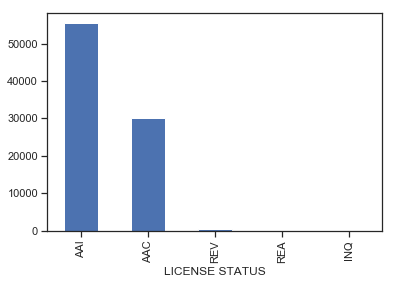

In [46]:
print(dataset.groupby(['LICENSE STATUS'])['LICENSE STATUS'].count().sort_values(ascending=False))
dataset.groupby(['LICENSE STATUS'])['LICENSE STATUS'].count().sort_values(ascending=False).plot.bar()

In [47]:
# Need to encode dependen variable columns

LICENSE_STATUS = {'AAI':1,'AAC':2,'REV':3,'REA':4,'INQ':5}
dataset['LICENSE STATUS'] = dataset['LICENSE STATUS'].map(LICENSE_STATUS)
dataset.head()

,ID,LICENSE ID,ACCOUNT NUMBER,LICENSE STATUS,WARD_most_frequent,PRECINCT_most_frequent,POLICE DISTRICT_most_frequent,LATITUDE_most_frequent,LONGITUDE_most_frequent,SSA_mean,WARD PRECINCT_NA,WARD_NA,PRECINCT_NA,POLICE DISTRICT_NA,SSA_NA,LICENSE STATUS CHANGE DATE_NA,LATITUDE_NA,LONGITUDE_NA,DATE ISSUED_Year,DATE ISSUED_Month,DATE ISSUED_Day,APPLICATION REQUIREMENTS COMPLETE_random_Year,APPLICATION REQUIREMENTS COMPLETE_random_Month,APPLICATION REQUIREMENTS COMPLETE_random_Day,LICENSE TERM START DATE_random_Year,LICENSE TERM START DATE_random_Month,LICENSE TERM START DATE_random_Day,LICENSE TERM EXPIRATION DATE_random_Year,LICENSE TERM EXPIRATION DATE_random_Month,LICENSE TERM EXPIRATION DATE_random_Day,LICENSE APPROVED FOR ISSUANCE_random_Year,LICENSE APPROVED FOR ISSUANCE_random_Month,LICENSE APPROVED FOR ISSUANCE_random_Day,PAYMENT DATE_random_Year,PAYMENT DATE_random_Month,PAYMENT DATE_random_Day,LICENSE STATUS CHANGE DATE_most_frequent_Year,LICENSE STATUS CHANGE DATE_most_frequent_Month,LICENSE STATUS CHANGE DATE_most_frequent_Day,LEGAL NAME_freq,SITE NUMBER_freq,DOING BUSINESS AS NAME_most_frequent_freq,ADDRESS_freq,CITY_freq,ZIP CODE_random_freq,STATE_freq,LICENSE CODE_freq,LICENSE NUMBER_most_frequent_freq,LICENSE DESCRIPTION_freq,WARD PRECINCT_most_frequent_freq,APPLICATION TYPE_C_EXPA,APPLICATION TYPE_C_LOC,APPLICATION TYPE_ISSUE,APPLICATION TYPE_RENEW,CONDITIONAL APPROVAL_Y
0,35342-20020816,1256593,32811,1,22.0,28.0,10.0,41.843613,-87.714618,25.00000,0,0,0,0,0,1,0,0,2006,4,1,2002,6,4,2002,8,4,2003,8,4,2002,8,2,2002,8,2,2012,12,5,1,61478,1,1,36744,356,80546,50078,1,50078,32,0,0,0,1,0
1,1358463-20051116,1639294,262311,2,33.0,23.0,17.0,41.961132,-87.699626,60.00000,0,0,0,0,0,0,0,0,2006,6,0,2005,9,3,2005,11,2,2006,11,2,2006,4,2,2005,11,3,2006,6,3,30,22,30,11,36744,889,80546,525,1,525,24,0,0,0,1,0
2,1980233-20090722,1980233,345008,1,42.0,9.0,18.0,41.908729,-87.654726,29.15208,1,1,1,1,1,1,1,1,2009,7,2,2009,7,2,2009,7,2,2011,7,4,2009,7,2,2009,7,2,2012,12,5,2,61478,5,2,27,158,80546,10633,1,10633,51148,0,0,1,0,0
3,1476582-20040211,1476582,273121,1,42.0,9.0,18.0,41.908729,-87.654726,29.15208,1,1,1,1,1,1,1,1,2004,2,2,2004,2,1,2004,2,2,2005,2,1,2004,2,1,2004,2,1,2012,12,5,6,61478,4,2,327,302,80546,50078,2,50078,51148,0,0,1,0,0
4,1141408-20080516,1896750,213785,1,42.0,9.0,18.0,41.908729,-87.654726,29.15208,1,1,1,1,1,1,1,1,2008,6,3,2008,3,0,2008,5,4,2010,5,5,2008,6,2,2008,6,2,2012,12,5,8,61478,8,8,163,34,80546,50078,8,50078,51148,0,0,0,1,0


### Check columns from Train dataset and Test dataset

In [48]:
trainColumns = dataset.columns.values

In [49]:
testset.columns.values

array(['ID', 'LICENSE ID', 'ACCOUNT NUMBER', 'WARD_most_frequent',
       'PRECINCT_most_frequent', 'POLICE DISTRICT_most_frequent',
       'LATITUDE_most_frequent', 'LONGITUDE_most_frequent', 'SSA_mean',
       'WARD PRECINCT_NA', 'WARD_NA', 'PRECINCT_NA', 'POLICE DISTRICT_NA',
       'SSA_NA', 'LICENSE STATUS CHANGE DATE_NA', 'LATITUDE_NA',
       'LONGITUDE_NA', 'DATE ISSUED_Year', 'DATE ISSUED_Month',
       'DATE ISSUED_Day', 'APPLICATION REQUIREMENTS COMPLETE_random_Year',
       'APPLICATION REQUIREMENTS COMPLETE_random_Month',
       'APPLICATION REQUIREMENTS COMPLETE_random_Day',
       'LICENSE TERM START DATE_random_Year',
       'LICENSE TERM START DATE_random_Month',
       'LICENSE TERM START DATE_random_Day',
       'LICENSE TERM EXPIRATION DATE_random_Year',
       'LICENSE TERM EXPIRATION DATE_random_Month',
       'LICENSE TERM EXPIRATION DATE_random_Day',
       'LICENSE APPROVED FOR ISSUANCE_random_Year',
       'LICENSE APPROVED FOR ISSUANCE_random_Month',
       '

In [50]:
missing_column = []
for value in testset.columns.values:
    if value in dataset.columns.values:
        continue
    else:
        print (value)
        missing_column.append(value)
missing_column

APPLICATION TYPE_C_SBA


['APPLICATION TYPE_C_SBA']

In [51]:
testset = testset.drop(missing_column, axis = 1)

In [52]:
dataset.head(1)

,ID,LICENSE ID,ACCOUNT NUMBER,LICENSE STATUS,WARD_most_frequent,PRECINCT_most_frequent,POLICE DISTRICT_most_frequent,LATITUDE_most_frequent,LONGITUDE_most_frequent,SSA_mean,WARD PRECINCT_NA,WARD_NA,PRECINCT_NA,POLICE DISTRICT_NA,SSA_NA,LICENSE STATUS CHANGE DATE_NA,LATITUDE_NA,LONGITUDE_NA,DATE ISSUED_Year,DATE ISSUED_Month,DATE ISSUED_Day,APPLICATION REQUIREMENTS COMPLETE_random_Year,APPLICATION REQUIREMENTS COMPLETE_random_Month,APPLICATION REQUIREMENTS COMPLETE_random_Day,LICENSE TERM START DATE_random_Year,LICENSE TERM START DATE_random_Month,LICENSE TERM START DATE_random_Day,LICENSE TERM EXPIRATION DATE_random_Year,LICENSE TERM EXPIRATION DATE_random_Month,LICENSE TERM EXPIRATION DATE_random_Day,LICENSE APPROVED FOR ISSUANCE_random_Year,LICENSE APPROVED FOR ISSUANCE_random_Month,LICENSE APPROVED FOR ISSUANCE_random_Day,PAYMENT DATE_random_Year,PAYMENT DATE_random_Month,PAYMENT DATE_random_Day,LICENSE STATUS CHANGE DATE_most_frequent_Year,LICENSE STATUS CHANGE DATE_most_frequent_Month,LICENSE STATUS CHANGE DATE_most_frequent_Day,LEGAL NAME_freq,SITE NUMBER_freq,DOING BUSINESS AS NAME_most_frequent_freq,ADDRESS_freq,CITY_freq,ZIP CODE_random_freq,STATE_freq,LICENSE CODE_freq,LICENSE NUMBER_most_frequent_freq,LICENSE DESCRIPTION_freq,WARD PRECINCT_most_frequent_freq,APPLICATION TYPE_C_EXPA,APPLICATION TYPE_C_LOC,APPLICATION TYPE_ISSUE,APPLICATION TYPE_RENEW,CONDITIONAL APPROVAL_Y
0,35342-20020816,1256593,32811,1,22.0,28.0,10.0,41.843613,-87.714618,25.0,0,0,0,0,0,1,0,0,2006,4,1,2002,6,4,2002,8,4,2003,8,4,2002,8,2,2002,8,2,2012,12,5,1,61478,1,1,36744,356,80546,50078,1,50078,32,0,0,0,1,0


In [53]:
testset.head(1)

,ID,LICENSE ID,ACCOUNT NUMBER,WARD_most_frequent,PRECINCT_most_frequent,POLICE DISTRICT_most_frequent,LATITUDE_most_frequent,LONGITUDE_most_frequent,SSA_mean,WARD PRECINCT_NA,WARD_NA,PRECINCT_NA,POLICE DISTRICT_NA,SSA_NA,LICENSE STATUS CHANGE DATE_NA,LATITUDE_NA,LONGITUDE_NA,DATE ISSUED_Year,DATE ISSUED_Month,DATE ISSUED_Day,APPLICATION REQUIREMENTS COMPLETE_random_Year,APPLICATION REQUIREMENTS COMPLETE_random_Month,APPLICATION REQUIREMENTS COMPLETE_random_Day,LICENSE TERM START DATE_random_Year,LICENSE TERM START DATE_random_Month,LICENSE TERM START DATE_random_Day,LICENSE TERM EXPIRATION DATE_random_Year,LICENSE TERM EXPIRATION DATE_random_Month,LICENSE TERM EXPIRATION DATE_random_Day,LICENSE APPROVED FOR ISSUANCE_random_Year,LICENSE APPROVED FOR ISSUANCE_random_Month,LICENSE APPROVED FOR ISSUANCE_random_Day,PAYMENT DATE_random_Year,PAYMENT DATE_random_Month,PAYMENT DATE_random_Day,LICENSE STATUS CHANGE DATE_most_frequent_Year,LICENSE STATUS CHANGE DATE_most_frequent_Month,LICENSE STATUS CHANGE DATE_most_frequent_Day,LEGAL NAME_freq,SITE NUMBER_freq,DOING BUSINESS AS NAME_most_frequent_freq,ADDRESS_freq,CITY_freq,ZIP CODE_random_freq,STATE_freq,LICENSE CODE_freq,LICENSE NUMBER_most_frequent_freq,LICENSE DESCRIPTION_freq,WARD PRECINCT_most_frequent_freq,APPLICATION TYPE_C_EXPA,APPLICATION TYPE_C_LOC,APPLICATION TYPE_ISSUE,APPLICATION TYPE_RENEW,CONDITIONAL APPROVAL_Y
0,1516615-20120216,2132209,280120,42.0,67.0,18.0,41.890047,-87.637467,29.852653,0,0,0,0,1,0,0,0,2012,1,4,2011,12,3,2012,2,3,2014,2,5,2012,1,3,2012,1,3,2012,12,5,1,39620,1,6,56597,2048,56912,476,1,476,78,0,0,0,1,0


## Completed with Data Preprocessing

## Feature Scaleing

In [54]:
models = []
acc = []
precision = []
recall = []
f1 = []

In [55]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [56]:
dataSub = dataset[(dataset['LICENSE STATUS'] == 3) | (dataset['LICENSE STATUS'] == 4) | (dataset['LICENSE STATUS'] == 5)]

In [57]:
X_sub = dataSub.drop(['ID','LICENSE ID','ACCOUNT NUMBER','LICENSE STATUS'], axis=1)
y_sub = dataSub[['LICENSE STATUS']]

In [58]:
col = list(X_sub.columns.values)
col2 = list(X_sub.columns.values)

In [59]:
#sm = SMOTE('minority',random_state=101)
oversampler=SMOTE(kind='regular',k_neighbors=1)
X_res, y_res = oversampler.fit_sample(X_sub, y_sub)

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [60]:
X_resDF = pd.DataFrame(X_res, columns= col)

In [61]:
y_resDF = pd.DataFrame(y_res, columns=['LICENSE STATUS'])

In [62]:
X_fin = dataset.drop(['ID','LICENSE ID','ACCOUNT NUMBER','LICENSE STATUS'], axis=1).append(X_resDF)
y_fin = dataset[['LICENSE STATUS']].append(y_resDF)

X = dataset.drop(['ID','LICENSE ID','ACCOUNT NUMBER','LICENSE STATUS'], axis=1).append(X_resDF).values
y = dataset[['LICENSE STATUS']].append(y_resDF).values

test = testset.drop(['ID','LICENSE ID','ACCOUNT NUMBER'], axis=1).values

In [63]:
dataset[['LICENSE STATUS']].append(y_resDF).isnull().sum()

LICENSE STATUS    0
dtype: int64

In [64]:
sm = SMOTE('minority',random_state=101)
X_res, y_res = oversampler.fit_sample(X, y)

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=101)

In [66]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#test = sc.transform(test)

In [67]:
test_data = sc.transform(test)

In [68]:
sc.mean_

array([ 3.39724751e+01,  1.85903644e+01,  1.51953473e+01,  4.19009991e+01,
       -8.76802827e+01,  3.02338145e+01,  3.94043524e-01,  3.94049196e-01,
        4.29723309e-01,  4.17410476e-01,  8.42774561e-01,  2.00409146e-01,
        3.85307103e-01,  3.85307103e-01,  2.00752846e+03,  6.94376451e+00,
        1.68658368e+00,  2.00734621e+03,  7.82129304e+00,  1.69204885e+00,
        2.00749921e+03,  7.35542196e+00,  1.92237253e+00,  2.00904770e+03,
        5.87348781e+00,  3.74624708e+00,  2.00747708e+03,  7.12749673e+00,
        1.30009878e+00,  2.00799379e+03,  6.07020438e+00,  1.73083345e+00,
        2.00935933e+03,  8.91385655e+00,  2.48827498e+00,  5.85626104e+00,
        4.47035266e+04,  4.86413840e+00,  3.96569594e+00,  2.25189144e+04,
        3.67405458e+02,  7.88772551e+04,  1.97397333e+04,  1.84260568e+00,
        1.97397333e+04,  2.04730807e+04,  1.24353509e-03,  6.75300372e-03,
        3.46116083e-01,  6.45846660e-01,  1.27800839e-04])

In [69]:
sc.var_

array([1.43926570e+02, 3.32299748e+03, 2.63915674e+01, 4.42349046e-03,
       2.77552203e-03, 4.62556001e+01, 2.38756967e-01, 2.38757463e-01,
       2.44898216e-01, 2.43007807e-01, 1.20076048e-01, 1.60245320e-01,
       2.36561849e-01, 2.36561849e-01, 1.27943629e+01, 9.94182809e+00,
       1.34355576e+00, 1.32437210e+01, 8.26409308e+00, 2.21011031e+00,
       1.28111338e+01, 1.06858128e+01, 3.22823444e+00, 1.63653622e+01,
       1.40742517e+01, 3.67377820e+00, 1.29591276e+01, 1.01196634e+01,
       2.08469404e+00, 9.37296462e+00, 1.28406922e+01, 1.66454191e+00,
       1.48462178e+01, 8.33756235e+00, 3.78023887e+00, 1.33962575e+03,
       5.62416036e+08, 8.69878097e+02, 6.18442239e+02, 3.13797930e+08,
       4.84217235e+04, 1.30434630e+08, 4.61873364e+08, 3.82287018e+00,
       4.61873364e+08, 6.26342127e+08, 1.23828894e-03, 6.41908123e-03,
       2.22644229e-01, 2.24887916e-01, 1.05326930e-04])

# Logistic Regression

In [70]:
# Fitting Logistic Regression to the Training set

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)
models.append('Logistic Regression')

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [71]:
X_train.shape

(207750, 51)

In [72]:
#Save the model on disk
pk.dump(lr, open('logistic_regression.sav','wb'))

In [73]:
lr.coef_

array([[ 7.35416078e-02,  9.62950587e-01,  1.93875595e-01,
        -5.64816086e-02, -9.15700919e-02, -4.48725851e-02,
        -1.03110141e-01, -1.03162885e-01,  6.32319272e-01,
         4.55801779e-01, -5.45513544e-02,  7.71953658e+00,
        -2.05773924e-01, -2.05773924e-01, -5.23277360e-01,
        -1.06672515e-01,  2.98415773e-01, -5.85455907e-01,
         1.66186014e-01,  5.36928360e-02, -5.77807135e-01,
        -1.88677816e-01,  5.37452296e-01, -6.45285198e-01,
        -1.35385678e-01, -5.45706075e-01, -2.65817777e-01,
        -1.33237428e-02,  4.82700544e-01, -6.99691293e-01,
         9.81400793e-02,  1.57964182e-01,  2.02696245e+00,
         2.25117855e+00,  2.40057117e+00,  1.16214036e+00,
        -2.05871324e-01, -2.25664542e-01, -3.66129433e-02,
         5.79596531e-02,  5.90898198e-02, -1.52086398e-01,
         6.61427517e-01,  6.89333810e-01,  6.61427517e-01,
         1.16035678e-01, -1.24135020e-03,  1.47297878e-01,
         1.39787897e-01, -1.63501775e-01, -6.17429292e-0

In [74]:
lr.intercept_

array([ -1.10976602,   8.62932931,   6.05081185, -10.27642596,
        -3.29394918])

In [75]:
lr.n_iter_

array([100])

In [76]:
lr.predict(X_test)

array([3, 4, 5, ..., 2, 2, 2], dtype=int64)

In [77]:
probs = lr.predict_proba(X_test)
probs

array([[1.19412567e-10, 2.07646767e-01, 7.92353058e-01, 1.74740211e-07,
        5.10731392e-12],
       [2.19521390e-09, 2.65633207e-03, 1.37597635e-02, 9.83583902e-01,
        7.04036136e-12],
       [1.97381393e-12, 5.01565514e-05, 6.20018759e-09, 3.84508408e-18,
        9.99949837e-01],
       ...,
       [1.72312224e-16, 9.61622110e-01, 3.83778898e-02, 5.35025122e-25,
        2.11616622e-12],
       [8.05746767e-08, 5.94773159e-01, 4.05226751e-01, 9.32654688e-09,
        6.35894621e-12],
       [2.40002765e-06, 9.56651638e-01, 4.33459586e-02, 1.42677680e-14,
        2.90119599e-09]])

In [78]:
#Load Model to predict

loaded_model_lr = pk.load(open('logistic_regression.sav', 'rb'))


### Logistic Regression Results Evaluation

In [79]:
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, 
                             recall_score, f1_score)

In [80]:
# print('Confusion Matrix for LR: \n',confusion_matrix(y_test, lr.predict(X_test)))
# print('Accuracy for LR: \n',accuracy_score(y_test, lr.predict(X_test)))
# acc.append(accuracy_score(y_test, lr.predict(X_test)))
# print('Precision for LR: \n',precision_score(y_test, lr.predict(X_test),average='micro'))
# precision.append(precision_score(y_test, lr.predict(X_test), average='micro'))
# print('Recall for LR: \n',recall_score(y_test, lr.predict(X_test), average='micro'))
# recall.append(recall_score(y_test, lr.predict(X_test), average='micro'))
# print('f1_score for LR: \n',f1_score(y_test, lr.predict(X_test), average='micro'))
# f1.append(f1_score(y_test, lr.predict(X_test), average='micro'))

In [81]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import classification_report
multilabel_confusion_matrix(y_test, lr.predict(X_test))

# target_names = ['AAI', 'AAC', 'REV','REA']
# print(classification_report(y_test, lr.predict(X_test), target_names=target_names))

array([[[55485,     0],
        [    1, 13764]],

       [[52318,  2786],
        [ 3345, 10801]],

       [[52243,  3293],
        [ 2786, 10928]],

       [[55359,    52],
        [    0, 13839]],

       [[55463,     1],
        [    0, 13786]]], dtype=int64)

In [82]:
target_names = ['AAI', 'AAC', 'REV', 'REA', 'INQ']
print(classification_report(y_test, lr.predict(X_test), target_names=target_names))

              precision    recall  f1-score   support

         AAI       1.00      1.00      1.00     13765
         AAC       0.79      0.76      0.78     14146
         REV       0.77      0.80      0.78     13714
         REA       1.00      1.00      1.00     13839
         INQ       1.00      1.00      1.00     13786

    accuracy                           0.91     69250
   macro avg       0.91      0.91      0.91     69250
weighted avg       0.91      0.91      0.91     69250



In [83]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = lr, 
                             X = X_train, 
                             y = y_train, 
                             cv = 10)
acMean = accuracies.mean()
print(acMean)
acStd = accuracies.std()
print(acStd)
print('Accurancy over samples',accuracies)

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

0.9136943441636582
0.0017492207239133725
Accurancy over samples [0.91480144 0.91104693 0.91085439 0.915716   0.91484958 0.91311673
 0.91282792 0.91306859 0.91634176 0.9143201 ]


C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [84]:
lr_results = lr.predict(test_data)
lr_results

array([2, 2, 1, ..., 1, 2, 1], dtype=int64)

In [85]:
testset['LICENSE STATUS'] = lr_results

In [86]:
# Need to encode dependen variable columns

REVERT_LICENSE_STATUS = {1:'AAI',2:'AAC',3:'REV',4:'REA',5:'INQ'}
testset['LICENSE STATUS'] = testset['LICENSE STATUS'].map(REVERT_LICENSE_STATUS)
testset.head()

,ID,LICENSE ID,ACCOUNT NUMBER,WARD_most_frequent,PRECINCT_most_frequent,POLICE DISTRICT_most_frequent,LATITUDE_most_frequent,LONGITUDE_most_frequent,SSA_mean,WARD PRECINCT_NA,WARD_NA,PRECINCT_NA,POLICE DISTRICT_NA,SSA_NA,LICENSE STATUS CHANGE DATE_NA,LATITUDE_NA,LONGITUDE_NA,DATE ISSUED_Year,DATE ISSUED_Month,DATE ISSUED_Day,APPLICATION REQUIREMENTS COMPLETE_random_Year,APPLICATION REQUIREMENTS COMPLETE_random_Month,APPLICATION REQUIREMENTS COMPLETE_random_Day,LICENSE TERM START DATE_random_Year,LICENSE TERM START DATE_random_Month,LICENSE TERM START DATE_random_Day,LICENSE TERM EXPIRATION DATE_random_Year,LICENSE TERM EXPIRATION DATE_random_Month,LICENSE TERM EXPIRATION DATE_random_Day,LICENSE APPROVED FOR ISSUANCE_random_Year,LICENSE APPROVED FOR ISSUANCE_random_Month,LICENSE APPROVED FOR ISSUANCE_random_Day,PAYMENT DATE_random_Year,PAYMENT DATE_random_Month,PAYMENT DATE_random_Day,LICENSE STATUS CHANGE DATE_most_frequent_Year,LICENSE STATUS CHANGE DATE_most_frequent_Month,LICENSE STATUS CHANGE DATE_most_frequent_Day,LEGAL NAME_freq,SITE NUMBER_freq,DOING BUSINESS AS NAME_most_frequent_freq,ADDRESS_freq,CITY_freq,ZIP CODE_random_freq,STATE_freq,LICENSE CODE_freq,LICENSE NUMBER_most_frequent_freq,LICENSE DESCRIPTION_freq,WARD PRECINCT_most_frequent_freq,APPLICATION TYPE_C_EXPA,APPLICATION TYPE_C_LOC,APPLICATION TYPE_ISSUE,APPLICATION TYPE_RENEW,CONDITIONAL APPROVAL_Y,LICENSE STATUS
0,1516615-20120216,2132209,280120,42.0,67.0,18.0,41.890047,-87.637467,29.852653,0,0,0,0,1,0,0,0,2012,1,4,2011,12,3,2012,2,3,2014,2,5,2012,1,3,2012,1,3,2012,12,5,1,39620,1,6,56597,2048,56912,476,1,476,78,0,0,0,1,0,AAC
1,69813-20110616,2090759,65043,16.0,5.0,7.0,41.786485,-87.676665,29.852653,0,0,0,0,1,0,0,0,2012,11,0,2011,4,4,2011,6,3,2013,6,5,2012,11,4,2012,11,4,2012,12,5,3,39620,3,3,56597,685,56912,28094,1,28094,34,0,0,0,1,0,AAC
2,1519227-20041116,1541990,281270,4.0,8.0,1.0,41.868269,-87.625695,29.852653,0,0,0,0,1,1,0,0,2004,12,1,2004,9,0,2004,11,1,2005,11,1,2004,12,0,2004,12,0,2012,12,5,2,39620,2,2,56597,644,56912,476,2,476,20,0,0,0,1,0,AAI
3,1922025-20100816,2041053,335243,9.0,33.0,5.0,41.655762,-87.608686,29.852653,0,0,0,0,1,0,0,0,2010,11,3,2010,6,1,2010,8,0,2012,8,2,2016,7,1,2010,11,3,2012,12,0,1,39620,1,1,56597,23,56912,127,1,127,3,0,0,0,1,0,AAC
4,1675683-20070816,1837158,283018,15.0,26.0,9.0,41.816969,-87.699785,39.000000,0,0,0,0,0,0,0,0,2007,8,3,2007,6,3,2007,8,3,2009,6,0,2007,8,2,2007,8,2,2008,3,2,3,2963,3,2,56597,1534,56912,28094,2,28094,43,0,0,0,1,0,AAC


In [87]:
output = testset[['ID','LICENSE STATUS']]
output.to_csv("Logistic_Result.csv", index = False)

In [88]:
testset.groupby(['LICENSE STATUS'])['LICENSE STATUS'].count().sort_values(ascending=False)

LICENSE STATUS
AAC    33597
AAI    23251
REV      345
REA       44
INQ        2
Name: LICENSE STATUS, dtype: int64

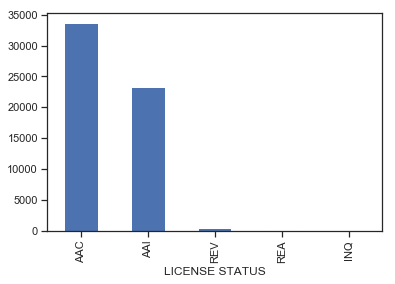

In [89]:
testset.groupby(['LICENSE STATUS'])['LICENSE STATUS'].count().sort_values(ascending=False).plot.bar()

# Random Forest Classification

In [90]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 300, criterion = 'entropy', random_state = 0)
rf.fit(X_train, y_train)
models.append('Random Forest')

In [91]:
#Save the model on disk
pk.dump(rf, open('Random_forest.sav','wb'))
#loaded_rf = pk.load(open('Random_forest.sav','rb'))

In [92]:
rf.predict(X_test)

array([3, 4, 5, ..., 2, 3, 3], dtype=int64)

### Random Forest Classification Results Evaluation

In [93]:
# print('Confusion Matrix for RF: \n',confusion_matrix(y_test, rf.predict(X_test)))
# print('Accuracy for RF: \n',accuracy_score(y_test, rf.predict(X_test)))
# acc.append(accuracy_score(y_test, rf.predict(X_test)))
# print('Precision for RF: \n',precision_score(y_test, rf.predict(X_test), average='micro'))
# precision.append(precision_score(y_test, rf.predict(X_test), average='micro'))
# print('Recall for RF: \n',recall_score(y_test, rf.predict(X_test), average='micro'))
# recall.append(recall_score(y_test, rf.predict(X_test), average='micro'))
# print('f1_score for RF: \n',f1_score(y_test, rf.predict(X_test), average='micro'))
# f1.append(f1_score(y_test, rf.predict(X_test), average='micro'))

In [94]:
rf = pk.load(open('Random_forest.sav','rb'))

In [95]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import classification_report
multilabel_confusion_matrix(y_test, rf.predict(X_test))

array([[[55485,     0],
        [    0, 13765]],

       [[55104,     0],
        [    2, 14144]],

       [[55534,     2],
        [    0, 13714]],

       [[55411,     0],
        [    0, 13839]],

       [[55464,     0],
        [    0, 13786]]], dtype=int64)

In [96]:
print(classification_report(y_test, rf.predict(X_test), target_names=target_names))

              precision    recall  f1-score   support

         AAI       1.00      1.00      1.00     13765
         AAC       1.00      1.00      1.00     14146
         REV       1.00      1.00      1.00     13714
         REA       1.00      1.00      1.00     13839
         INQ       1.00      1.00      1.00     13786

    accuracy                           1.00     69250
   macro avg       1.00      1.00      1.00     69250
weighted avg       1.00      1.00      1.00     69250



In [97]:
rf_results = rf.predict(test_data)
rf_results

array([2, 2, 1, ..., 1, 2, 1], dtype=int64)

#### K-Fold Cross Validation on Random Forest Classification Algorithm

In [98]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = rf, 
                             X = X_train, 
                             y = y_train, 
                             cv = 10)
acMean = accuracies.mean()
acStd = accuracies.std()

In [99]:
acMean

0.999971119133574

In [100]:
acStd

3.1928999185120835e-05

In [101]:
accuracies

array([1.        , 0.99995187, 1.        , 1.        , 1.        ,
       0.99995187, 0.99995187, 0.99990373, 0.99995187, 1.        ])

In [102]:
testset['LICENSE STATUS'] = rf_results
testset['LICENSE STATUS'] = testset['LICENSE STATUS'].map(REVERT_LICENSE_STATUS)
testset.head()
output = testset[['ID','LICENSE STATUS']]
output.to_csv("RF_Result.csv", index = False)

In [103]:
testset.groupby(['LICENSE STATUS'])['LICENSE STATUS'].count().sort_values(ascending=False)

LICENSE STATUS
AAC    32661
AAI    23246
REV     1332
Name: LICENSE STATUS, dtype: int64

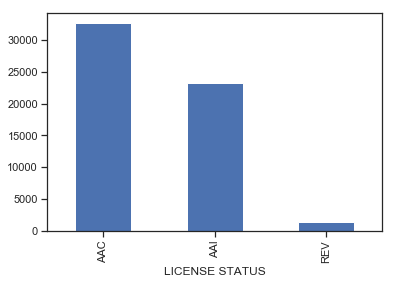

In [104]:
testset.groupby(['LICENSE STATUS'])['LICENSE STATUS'].count().sort_values(ascending=False).plot.bar()

In [105]:
# Feature Selection from Random Forest Classification

In [106]:
rf.feature_importances_

array([6.66284694e-03, 4.86317857e-03, 7.16108153e-03, 4.92839805e-03,
       4.70086015e-03, 2.17622416e-03, 3.70140466e-02, 3.13624884e-02,
       4.46646117e-02, 2.48648599e-02, 1.33272357e-03, 1.05757953e-01,
       1.41184437e-02, 1.41066096e-02, 1.89009213e-02, 1.30827263e-02,
       9.34946817e-03, 1.64502890e-02, 2.97214241e-03, 5.81876946e-03,
       2.67588353e-02, 2.13339682e-02, 9.85341940e-03, 2.00319582e-02,
       1.06014374e-02, 1.10265026e-02, 1.43582431e-02, 8.21258043e-03,
       3.56943939e-02, 1.13464003e-02, 1.28378637e-02, 4.04315367e-02,
       5.98337372e-02, 4.89936656e-02, 5.24220188e-02, 1.58918957e-02,
       4.46746238e-03, 1.50066136e-02, 9.81313529e-03, 2.96552014e-02,
       3.69002736e-02, 4.86052328e-06, 2.85534412e-02, 1.27434969e-02,
       2.72483851e-02, 5.90286300e-02, 5.91000098e-05, 2.61330230e-05,
       3.92156282e-03, 2.65127860e-03, 3.32674201e-06])

In [107]:
model_features = dataset.columns[4:]

In [108]:
cols = dataset.columns[4:]

In [109]:
def feature_select(X, y, cols, cutoff):
    regressor = RandomForestClassifier(n_estimators = 300, random_state = 0)
    regressor.fit(X, y)
    global feat_imps
    feat_imps = pd.concat([pd.DataFrame(cols, columns=['Features']),
                       pd.DataFrame(rf.feature_importances_, columns=['Importances'])],axis=1)
    feat_imps = feat_imps.sort_values(['Importances'], ascending=False)
    feat_imps['Cumulative Importances'] = feat_imps['Importances'].cumsum()
    #print(feat_imps)
    feat_imps = feat_imps[feat_imps['Cumulative Importances'] < cutoff]
    return feat_imps['Features'].tolist()

In [110]:
imp_cols = feature_select(X_res, y_res, cols, 0.95)
feat_imps

,Features,Importances,Cumulative Importances
11,LICENSE STATUS CHANGE DATE_NA,0.105758,0.105758
32,LICENSE STATUS CHANGE DATE_most_frequent_Year,0.059834,0.165592
45,WARD PRECINCT_most_frequent_freq,0.059029,0.224620
34,LICENSE STATUS CHANGE DATE_most_frequent_Day,0.052422,0.277042
33,LICENSE STATUS CHANGE DATE_most_frequent_Month,0.048994,0.326036
8,PRECINCT_NA,0.044665,0.370701
31,PAYMENT DATE_random_Day,0.040432,0.411132
6,WARD PRECINCT_NA,0.037014,0.448146
40,ZIP CODE_random_freq,0.036900,0.485046
28,LICENSE APPROVED FOR ISSUANCE_random_Day,0.035694,0.520741


### Logistic Regression Model building based on Feature importance upto 0.95

In [111]:
X = X_fin[imp_cols].values

In [112]:
y = y_fin['LICENSE STATUS'].values
y.shape

(86765,)

In [113]:
sm = SMOTE('minority',random_state=101)
X_res, y_res = oversampler.fit_sample(X, y)

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, cate

In [114]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.25, random_state = 100)

In [115]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
meanX = sc_X.mean_
varX = sc_X.var_

X_test = sc_X.transform(X_test)

In [116]:
# Fitting Multi Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
log_regressor = LogisticRegression(n_jobs=-1)
log_regressor.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [117]:
# print('Confusion Matrix for LR: \n',confusion_matrix(y_test, log_regressor.predict(X_test)))
# print('Accuracy for LR: \n',accuracy_score(y_test, log_regressor.predict(X_test)))
# acc.append(accuracy_score(y_test, log_regressor.predict(X_test)))
# print('Precision for LR: \n',precision_score(y_test, log_regressor.predict(X_test),average='micro'))
# precision.append(precision_score(y_test, log_regressor.predict(X_test), average='micro'))
# print('Recall for LR: \n',recall_score(y_test, log_regressor.predict(X_test), average='micro'))
# recall.append(recall_score(y_test, log_regressor.predict(X_test), average='micro'))
# print('f1_score for LR: \n',f1_score(y_test, log_regressor.predict(X_test), average='micro'))
# f1.append(f1_score(y_test, log_regressor.predict(X_test), average='micro'))

In [118]:
multilabel_confusion_matrix(y_test, log_regressor.predict(X_test))

array([[[55315,     0],
        [    2, 13933]],

       [[52259,  3065],
        [ 3270, 10656]],

       [[52395,  3090],
        [ 3115, 10650]],

       [[55206,   230],
        [    0, 13814]],

       [[55438,     2],
        [    0, 13810]]], dtype=int64)

In [119]:
print(classification_report(y_test, log_regressor.predict(X_test), target_names=target_names))

              precision    recall  f1-score   support

         AAI       1.00      1.00      1.00     13935
         AAC       0.78      0.77      0.77     13926
         REV       0.78      0.77      0.77     13765
         REA       0.98      1.00      0.99     13814
         INQ       1.00      1.00      1.00     13810

    accuracy                           0.91     69250
   macro avg       0.91      0.91      0.91     69250
weighted avg       0.91      0.91      0.91     69250



In [138]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = log_regressor, 
                             X = X_train, 
                             y = y_train, 
                             cv = 10)
acMean = accuracies.mean()
print(acMean)
acStd = accuracies.std()
print(acStd)
print(accuracies)

0.9073501805054152
0.0021171423980591727
[0.90512635 0.90623345 0.90758123 0.90709988 0.90681107 0.90425993
 0.90950662 0.90724428 0.9122503  0.90738869]


In [139]:
testData = testset[imp_cols].values
testData = sc_X.transform(testData)

In [140]:
log_regressor_results = log_regressor.predict(testData)

In [141]:
testset['LICENSE STATUS'] = log_regressor_results
testset['LICENSE STATUS'] = testset['LICENSE STATUS'].map(REVERT_LICENSE_STATUS)
testset.head()
output = testset[['ID','LICENSE STATUS']]
output.to_csv("log_regressor_results.csv", index = False)

In [142]:
testset.groupby(['LICENSE STATUS'])['LICENSE STATUS'].count().sort_values(ascending=False)

LICENSE STATUS
AAI    23245
REV    20708
AAC    13216
REA       55
INQ       15
Name: LICENSE STATUS, dtype: int64

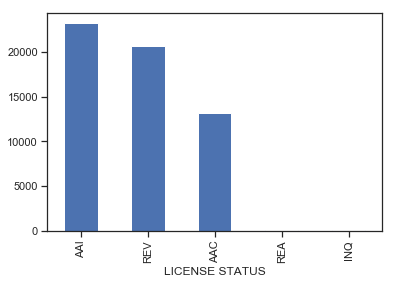

In [143]:
testset.groupby(['LICENSE STATUS'])['LICENSE STATUS'].count().sort_values(ascending=False).plot.bar()

### Random Forest Classification based on Features importance 0.95

In [144]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
rf_98 = RandomForestClassifier(n_estimators = 300, criterion = 'entropy', random_state = 0)
rf_98.fit(X_train, y_train)
models.append('Random Forest Importances_98')

In [145]:
#Save the model on disk
pk.dump(rf_98, open('Random_forest Importances_98.sav','wb'))

#loaded_rf = pk.load(open('Random_forest.sav','rb'))

In [146]:
rf_98.predict(X_test)

array([3, 1, 1, ..., 2, 3, 3], dtype=int64)

### Evaluation

In [147]:
# print('Confusion Matrix for RF: \n',confusion_matrix(y_test, rf_98.predict(X_test)))
# print('Accuracy for RF: \n',accuracy_score(y_test, rf_98.predict(X_test)))
# acc.append(accuracy_score(y_test, rf_98.predict(X_test)))
# print('Precision for RF: \n',precision_score(y_test, rf_98.predict(X_test), average='micro'))
# precision.append(precision_score(y_test, rf_98.predict(X_test), average='micro'))
# print('Recall for RF: \n',recall_score(y_test, rf_98.predict(X_test), average='micro'))
# recall.append(recall_score(y_test, rf_98.predict(X_test), average='micro'))
# print('f1_score for RF: \n',f1_score(y_test, rf_98.predict(X_test), average='micro'))
# f1.append(f1_score(y_test, rf_98.predict(X_test), average='micro'))

In [148]:
multilabel_confusion_matrix(y_test, rf_98.predict(X_test))

array([[[55315,     0],
        [    0, 13935]],

       [[55324,     0],
        [    1, 13925]],

       [[55484,     1],
        [    0, 13765]],

       [[55436,     0],
        [    0, 13814]],

       [[55440,     0],
        [    0, 13810]]], dtype=int64)

In [149]:
print(classification_report(y_test, rf_98.predict(X_test), target_names=target_names))

              precision    recall  f1-score   support

         AAI       1.00      1.00      1.00     13935
         AAC       1.00      1.00      1.00     13926
         REV       1.00      1.00      1.00     13765
         REA       1.00      1.00      1.00     13814
         INQ       1.00      1.00      1.00     13810

    accuracy                           1.00     69250
   macro avg       1.00      1.00      1.00     69250
weighted avg       1.00      1.00      1.00     69250



In [150]:
rf_results = rf_98.predict(testData)
rf_results

array([2, 2, 1, ..., 1, 2, 1], dtype=int64)

##### K-Fold Cross Validation on the new Random Forest Model

In [151]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = rf_98, 
                             X = X_train, 
                             y = y_train, 
                             cv = 10)
acMean = accuracies.mean()
print(acMean)
acStd = accuracies.std()
print(acStd)
print(accuracies)

0.9999326113116727
6.164259193678278e-05
[0.99990373 1.         0.99990373 0.99990373 1.         0.99980746
 1.         0.99990373 0.99990373 1.        ]


In [152]:
testset['LICENSE STATUS'] = rf_results
testset['LICENSE STATUS'] = testset['LICENSE STATUS'].map(REVERT_LICENSE_STATUS)
testset.head()
output = testset[['ID','LICENSE STATUS']]
output.to_csv("RF_Result_98.csv", index = False)

In [153]:
testset.groupby(['LICENSE STATUS'])['LICENSE STATUS'].count().sort_values(ascending=False)

LICENSE STATUS
AAC    32436
AAI    23246
REV     1557
Name: LICENSE STATUS, dtype: int64

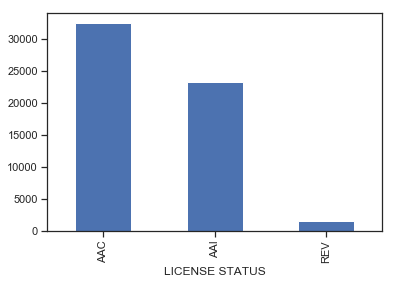

In [154]:
testset.groupby(['LICENSE STATUS'])['LICENSE STATUS'].count().sort_values(ascending=False).plot.bar()

### Hyperparameter tuneing On Random Forest Classification model

In [ ]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = {"n_estimators": [100, 200, 300],
              "criterion":['gini','entropy'],
              "max_depth": [8, 16, 32],
              "min_samples_split": [10, 20, 30],
              "min_samples_leaf": [1, 5, 15],
              "min_weight_fraction_leaf": [0.1, 0.05, 0.005]}
grid_search = GridSearchCV(estimator = rf_98,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

In [ ]:
best_accuracy = grid_search.best_score_
best_accuracy

In [ ]:
best_parameters = grid_search.best_params_
best_parameters

In [ ]:
tunedRF = pk.load(open('Random_forest.sav','rb'))

In [ ]:
# Fitting Final Model on training set
from sklearn.ensemble import RandomForestClassifier
tunedRF = RandomForestClassifier(n_estimators = best_parameters["n_estimators"],
                                 criterion = best_parameters["criterion"],
                                 max_depth = best_parameters["max_depth"],
                                 min_samples_split = best_parameters["min_samples_split"],
                                 min_samples_leaf = best_parameters["min_samples_leaf"],
                                 min_weight_fraction_leaf = best_parameters["min_weight_fraction_leaf"])
tunedRF.fit(X_train, y_train)

In [ ]:
# print('Confusion Matrix for RF: \n',confusion_matrix(y_test, tunedRF.predict(X_test)))
# print('Accuracy for RF: \n',accuracy_score(y_test, tunedRF.predict(X_test)))
# acc.append(accuracy_score(y_test, tunedRF.predict(X_test)))
# print('Precision for RF: \n',precision_score(y_test, tunedRF.predict(X_test), average='micro'))
# precision.append(precision_score(y_test, tunedRF.predict(X_test), average='micro'))
# print('Recall for RF: \n',recall_score(y_test, tunedRF.predict(X_test), average='micro'))
# recall.append(recall_score(y_test, tunedRF.predict(X_test), average='micro'))
# print('f1_score for RF: \n',f1_score(y_test, tunedRF.predict(X_test), average='micro'))
# f1.append(f1_score(y_test, tunedRF.predict(X_test), average='micro'))

In [ ]:
multilabel_confusion_matrix(y_test, tunedRF.predict(X_test))

In [ ]:
target_names = ['AAI', 'AAC', 'REV','REA']
print(classification_report(y_test, tunedRF.predict(X_test), target_names=target_names))

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = rf_98, 
                             X = X_train, 
                             y = y_train, 
                             cv = 10)
acMean = accuracies.mean()
print(acMean)
acStd = accuracies.std()
print(acStd)
print(accuracies)

In [ ]:
tunedRF_Results = tunedRF.predict(testData)
testset['LICENSE STATUS'] = tunedRF_Results
testset['LICENSE STATUS'] = testset['LICENSE STATUS'].map(REVERT_LICENSE_STATUS)
testset.head()
output = testset[['ID','LICENSE STATUS']]
output.to_csv("tunedRF.csv", index = False)

In [ ]:
#Save the model on disk
pk.dump(tunedRF, open('tunedRF.sav','wb'))

In [ ]:
testset.groupby(['LICENSE STATUS'])['LICENSE STATUS'].count().sort_values(ascending=False)

In [ ]:
testset.groupby(['LICENSE STATUS'])['LICENSE STATUS'].count().sort_values(ascending=False).plot.bar()